## Outlook

- GDP
    - Real Growth
    - PPP GDP
    - Deflator
    - PPP Real GDP
    - GDP per Capita
    - Output Gap
    - Share of Global PPP Share
    
- Currency
    - PPP 

- Government
    - Investment as % of GDP
    - Gross Savings as % of GDP
    - Revenues as % of GDP
    - Expenditures as % of GDP
    - Structural Balance as % GDP
    - Primary Balance as % GDP
    - Net Debt as % GDP
    - Current Account as % GDP

- Prices
    - Inflation YoY

- Trade
    - Volume of Imports of Goods and Services 
    - Volume of Exports of Goods and Services 

- Labor
    - UR
    - Employment Levels
    - Population Growth


### Packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.style.use("default")
import matplotlib.ticker as ticker 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append('c:\\Users\\patri\\OneDrive\\Desktop\\Python\\Macro_Dashboard\\')
import times_series as ts
from openbb import obb

%matplotlib inline

### Data

In [2]:
imf = pd.read_excel("c:\\Users\\patri\\OneDrive\\Desktop\\Python\\Outlook\\IMF_DM.xlsx")
imf.set_index('date', inplace=True)
imf.index = pd.to_datetime(imf.index.astype(str), format='%Y')

In [3]:
bis = pd.read_excel("c:\\Users\\patri\\OneDrive\\Desktop\\Python\\Outlook\\bis_DSR.xlsx")
bis.set_index('date', inplace=True)
bis.index = pd.to_datetime(bis.index.astype(str), format='%Y-%m-%d')

In [4]:
for i in ['au', 'ca', 'de', 'fr', 'gb', 'it', 'jp', 'us']:
    imf[f'{i}_emp'] = 100*((imf[f'{i}_emp']/imf[f'{i}_emp'].shift(1))-1)
    imf[f'{i}_pop'] = 100*((imf[f'{i}_pop']/imf[f'{i}_pop'].shift(1))-1)
    imf[f'{i}_defl'] = 100*((imf[f'{i}_defl']/imf[f'{i}_defl'].shift(1))-1)
    imf[f'{i}_volimpgs_yoy'] = 100*((imf[f'{i}_volimpgs_yoy']/imf[f'{i}_volimpgs_yoy'].shift(1))-1)
    imf[f'{i}_volexpgs_yoy'] = 100*((imf[f'{i}_volexpgs_yoy']/imf[f'{i}_volexpgs_yoy'].shift(1))-1)

In [5]:
imfc = ['au', 'ca', 'de', 'fr', 'gb', 'it', 'jp', 'us']
bisc = ['au', 'ca', 'de', 'fr', 'gb', 'it', 'jp', 'us']

ylabels = ['%YoY', 'Intl$', '%YoY', 'Intl$', 'US$', '%GDP', 
           '%', 'PPP', '%GDP', '%GDP', '%GDP', '%GDP', '%GDP', 
           '%GDP', '%GDP', '%GDP', '%YoY', '%YoY', '%YoY',  
           '%', '%YoY', '%YoY']

variables = ['gdpr_g','gdp_ppp','defl','gdpr_ppp','gdpcap',
             'otptgap',	'gdp_ppp_share','ppp',	'invsmt_gdp','svg_gdp',
             'govrev_gdp','govexp_gdp','govstrcbal_gdp','govprimbal_gdp',
             'govndebt_gdp','curacc_gdp','infl_yoy','volimpgs_yoy','volexpgs_yoy',
             'ur','emp','pop']

Title = ['Real GDP Growth',	'PPP GDP',	'Deflator YoY',	'Real PPP GDP',	
         'GDP per Capita',	'Output Gap',	'Share of Global PPP Share',
         'PPP',	'Investment as % of GDP',	'Gross Savings as % of GDP',
         'Revenues as % of GDP',	'Expenditures as % of GDP',	
         'Structural Balance as % GDP',	'Primary Balance as % GDP',	
         'Net Debt as % GDP',	'Current Account as % GDP',	'Inflation YoY',	
         'Volume of Imported Goods and Services ',	
         'Volume of Exported Goods and Services ',	'Unemployment Rate',	
         'Employment Growth',	'Population Growth']

### Charts


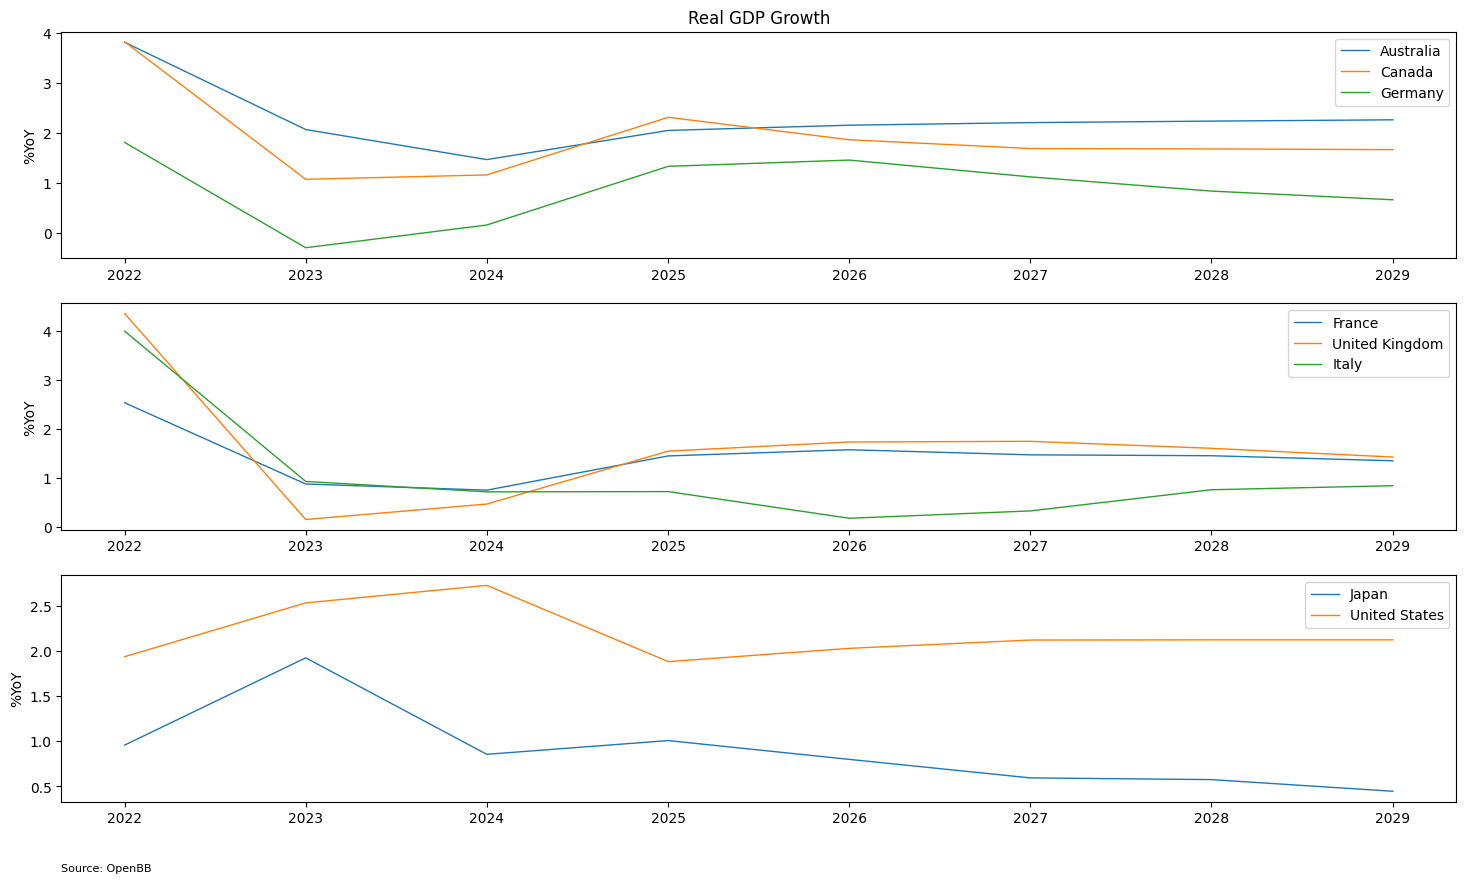

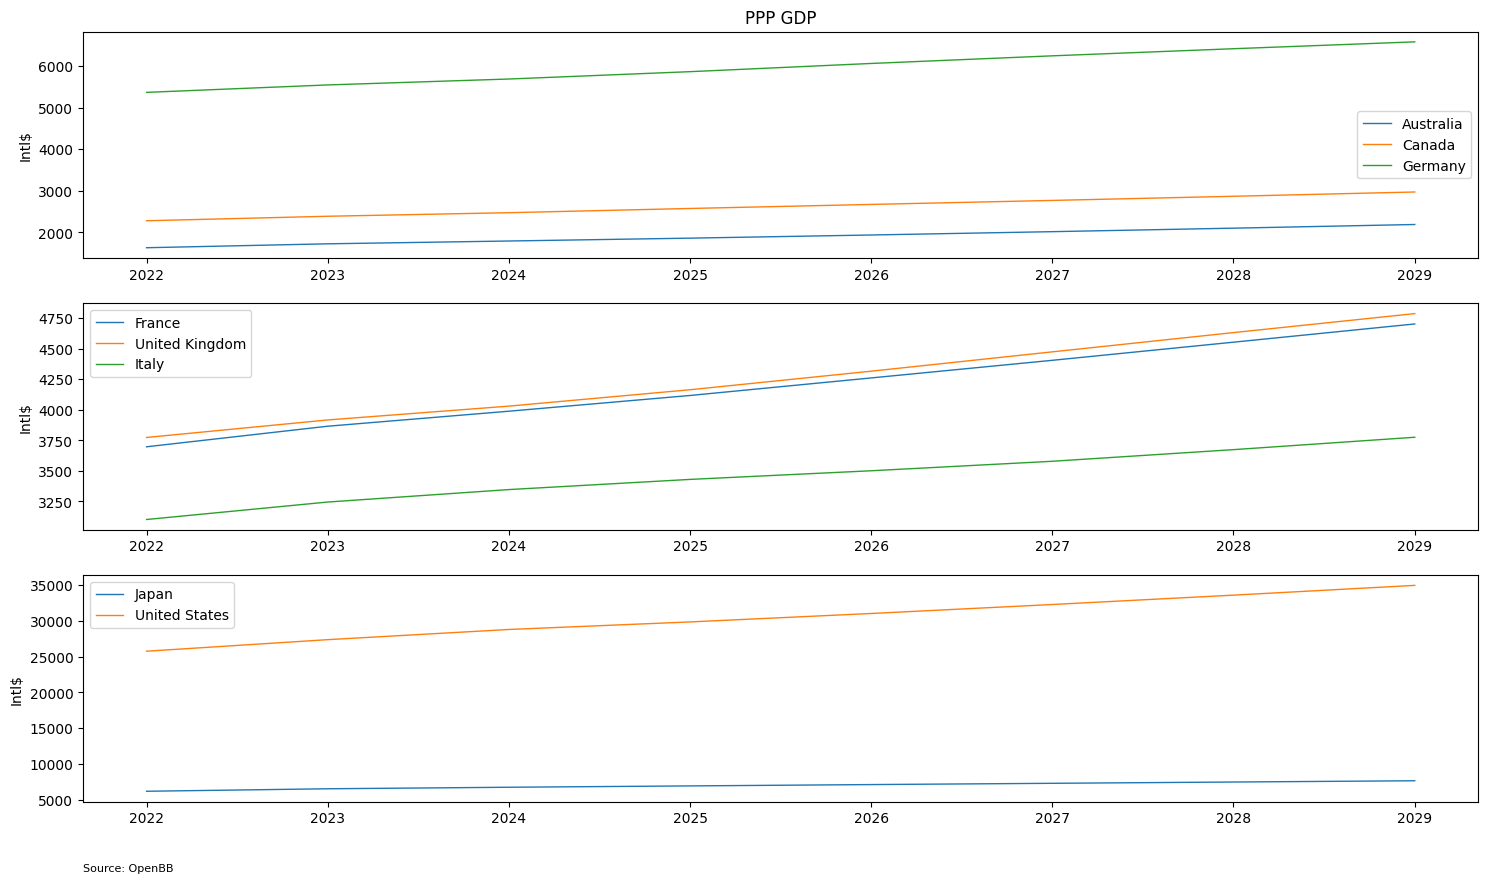

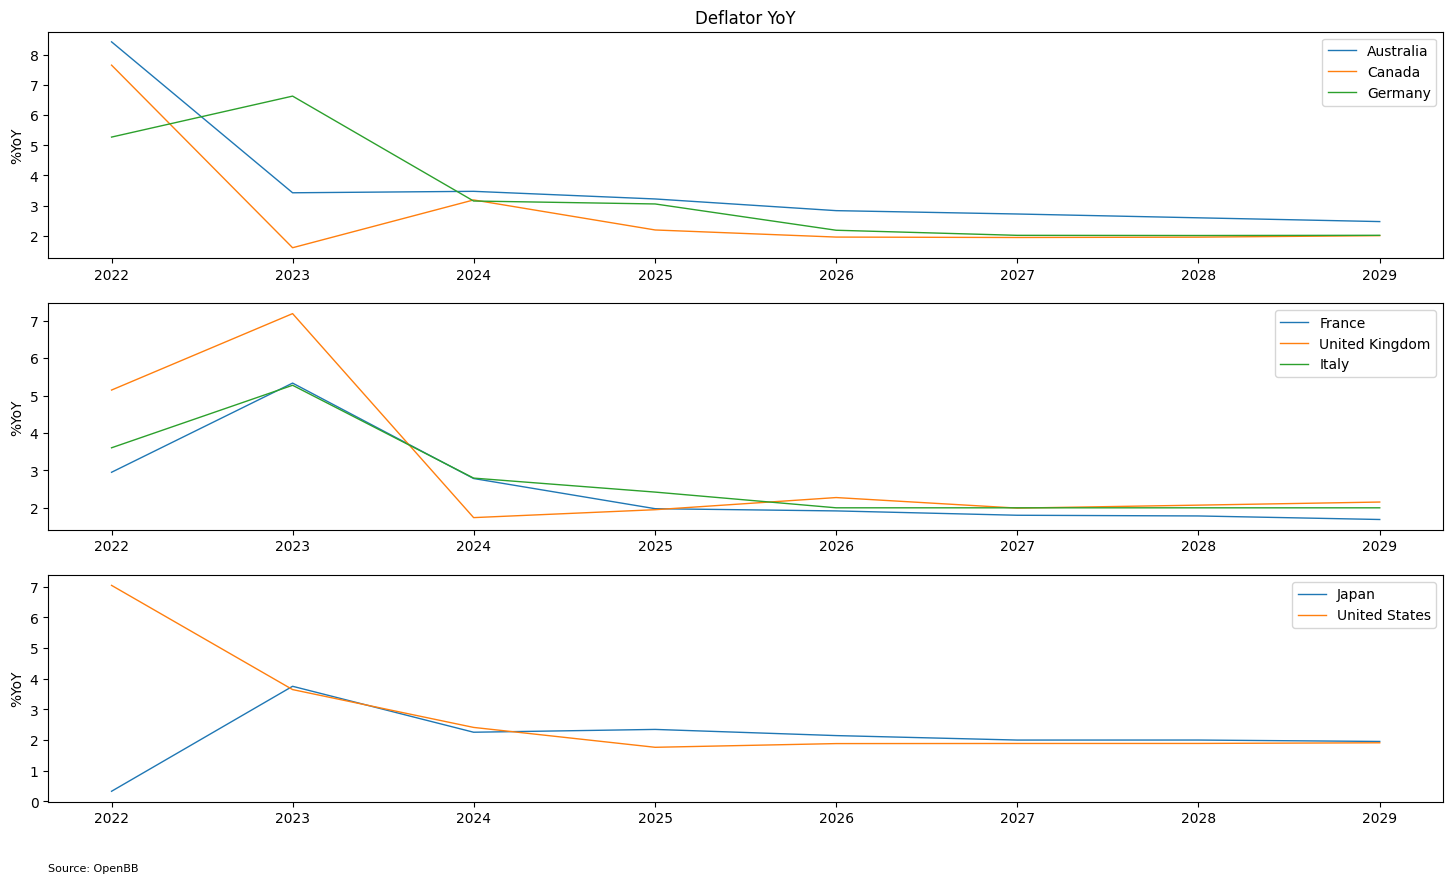

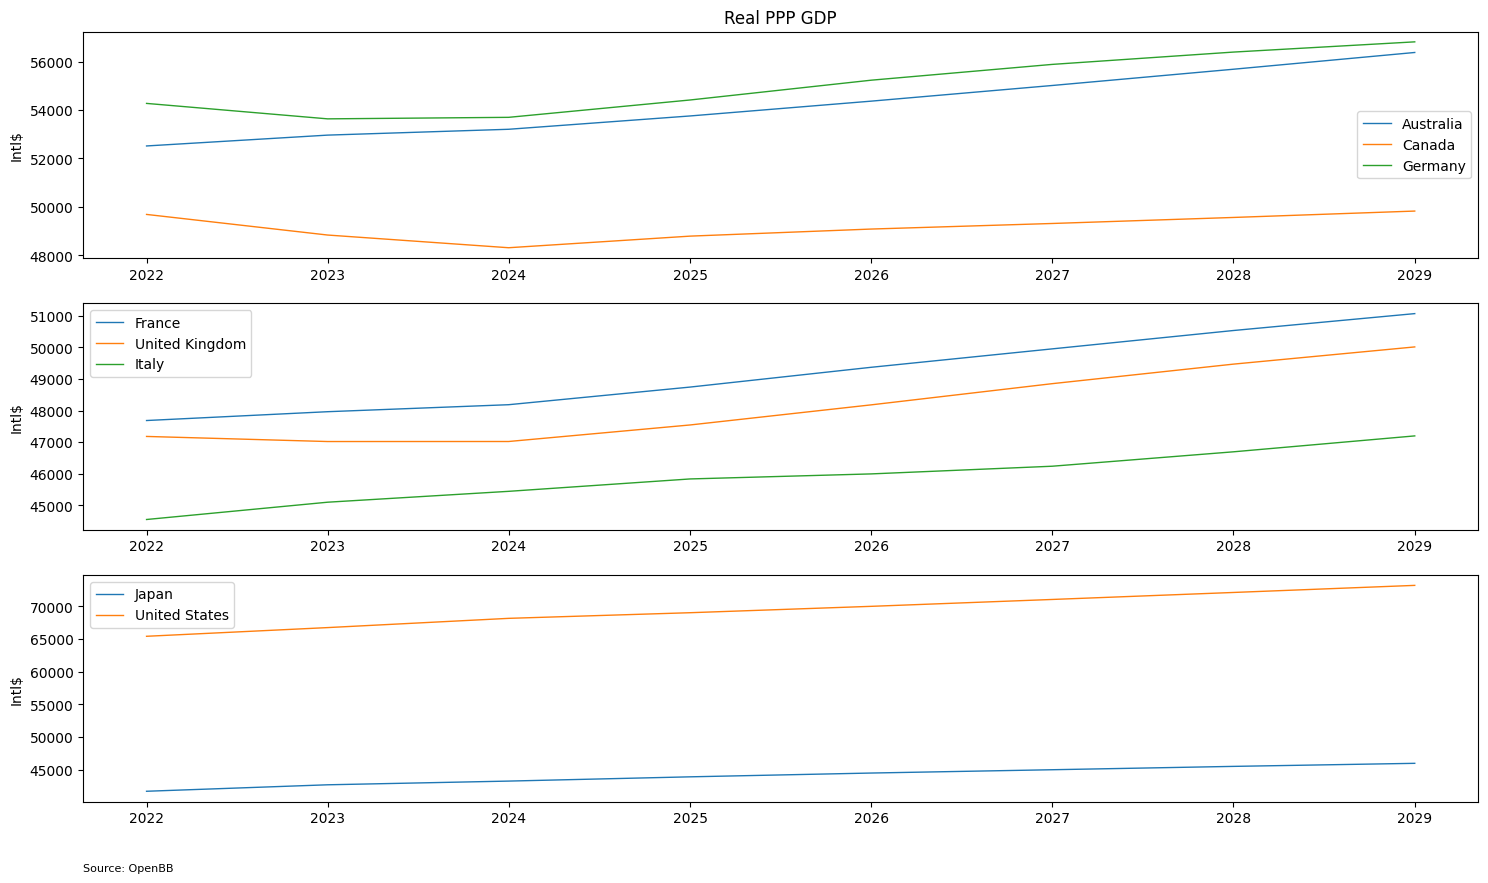

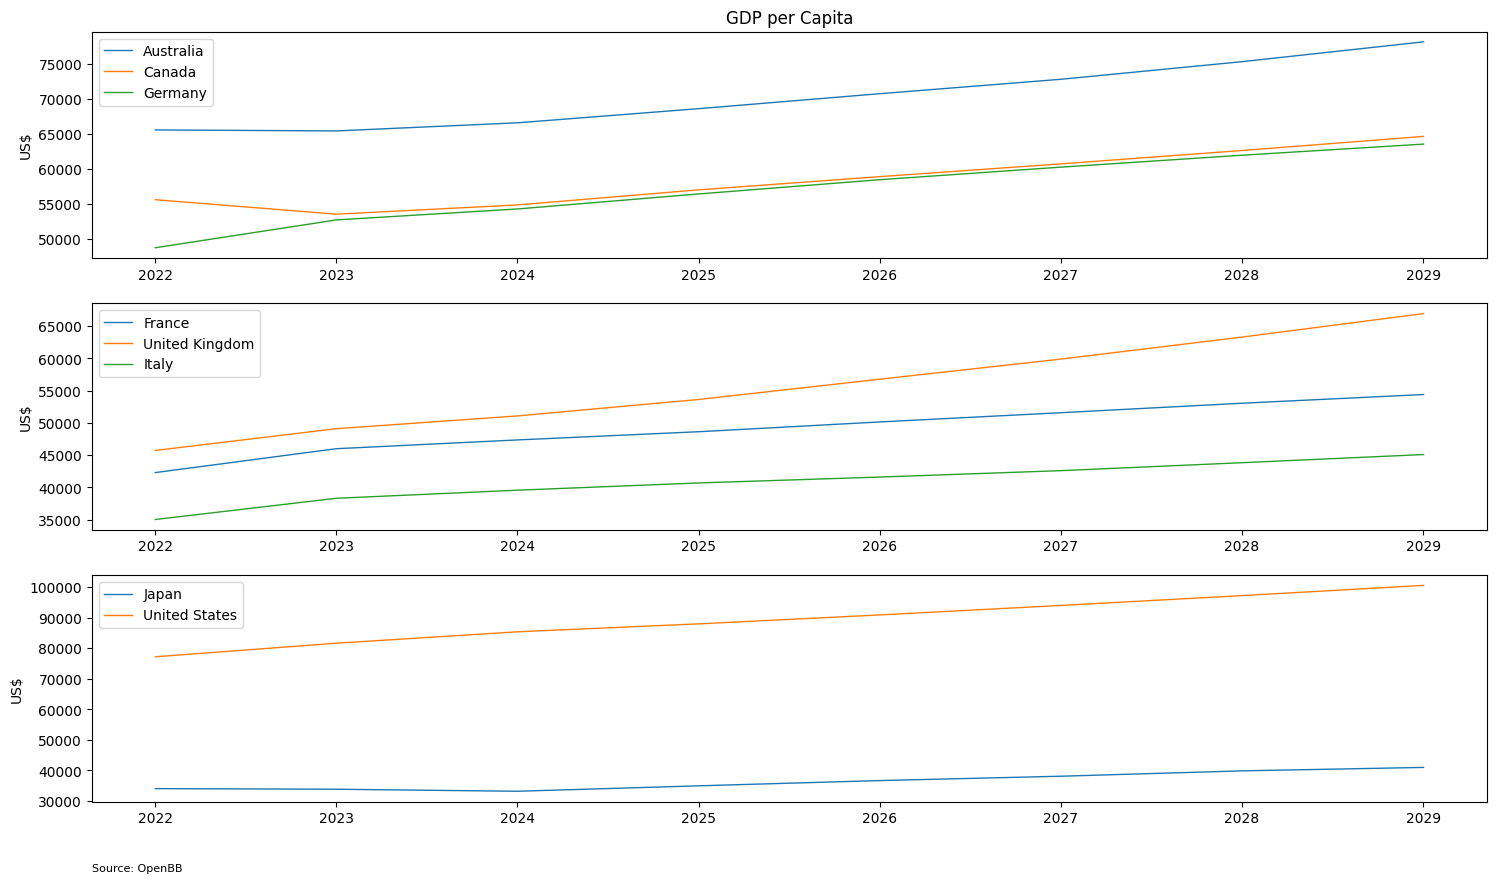

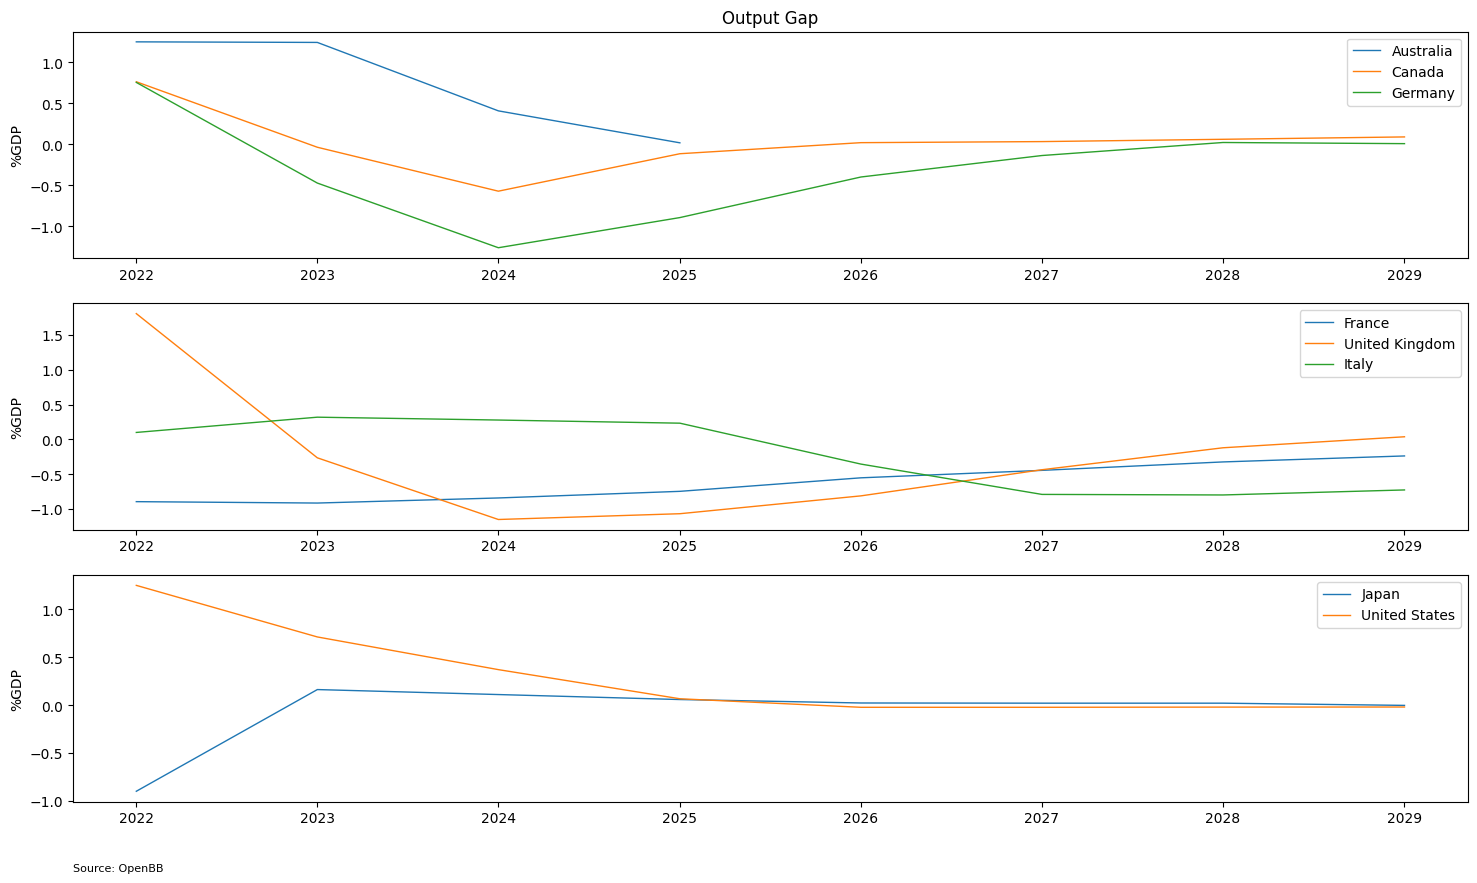

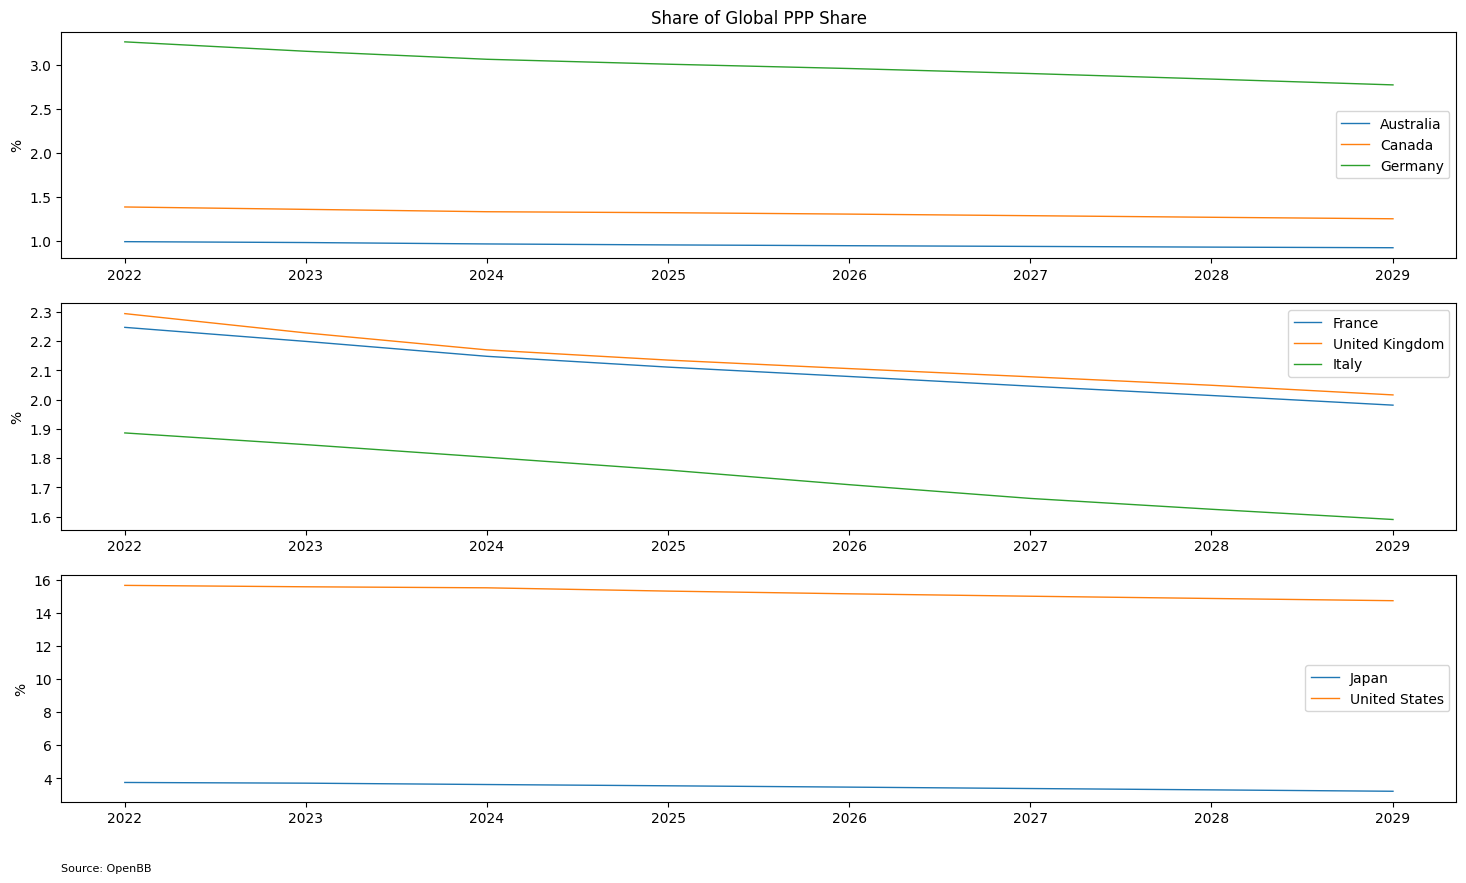

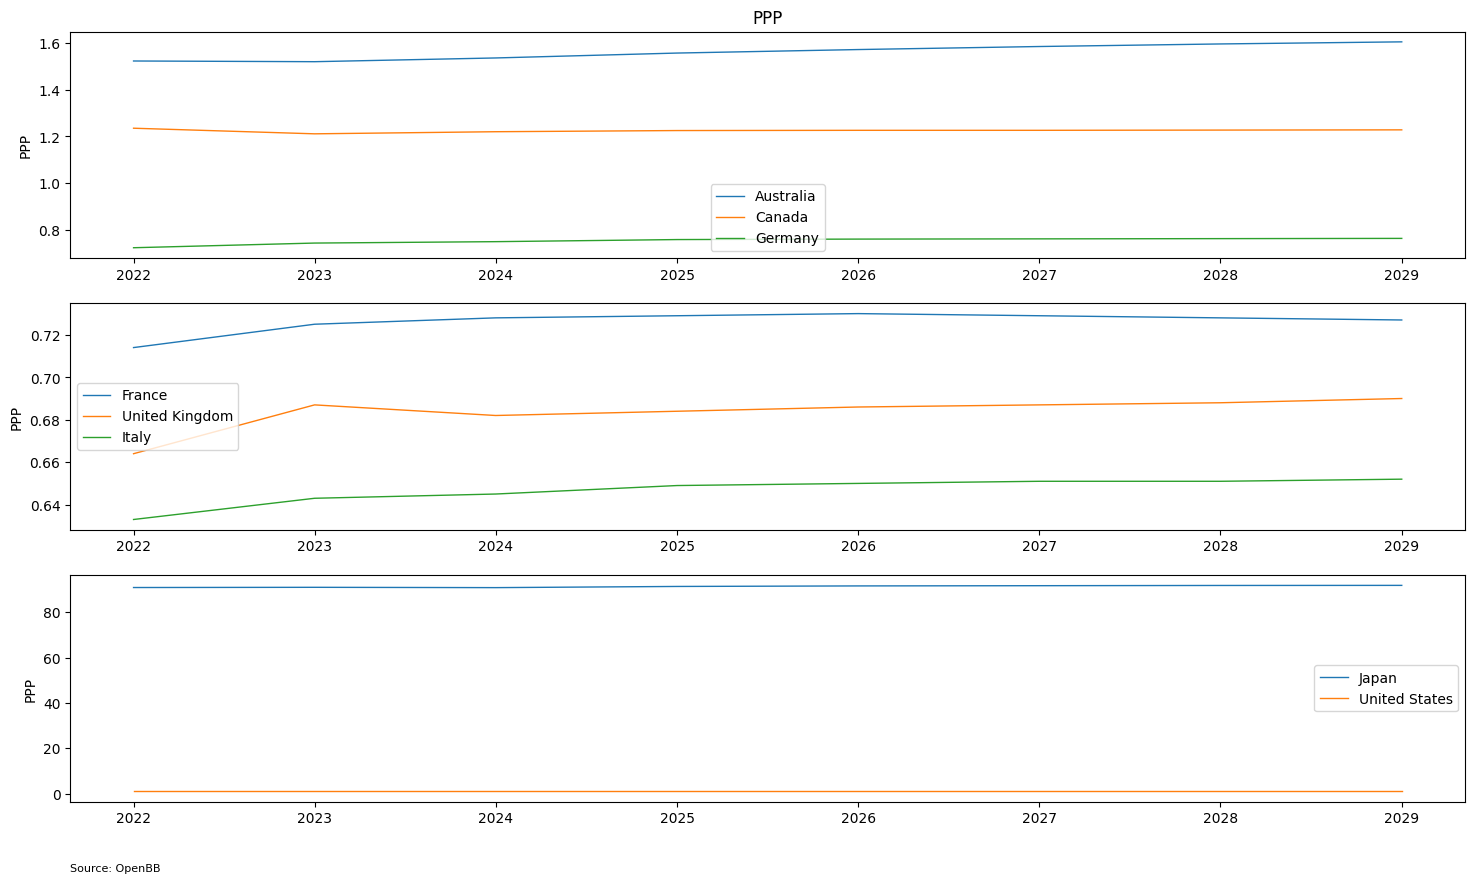

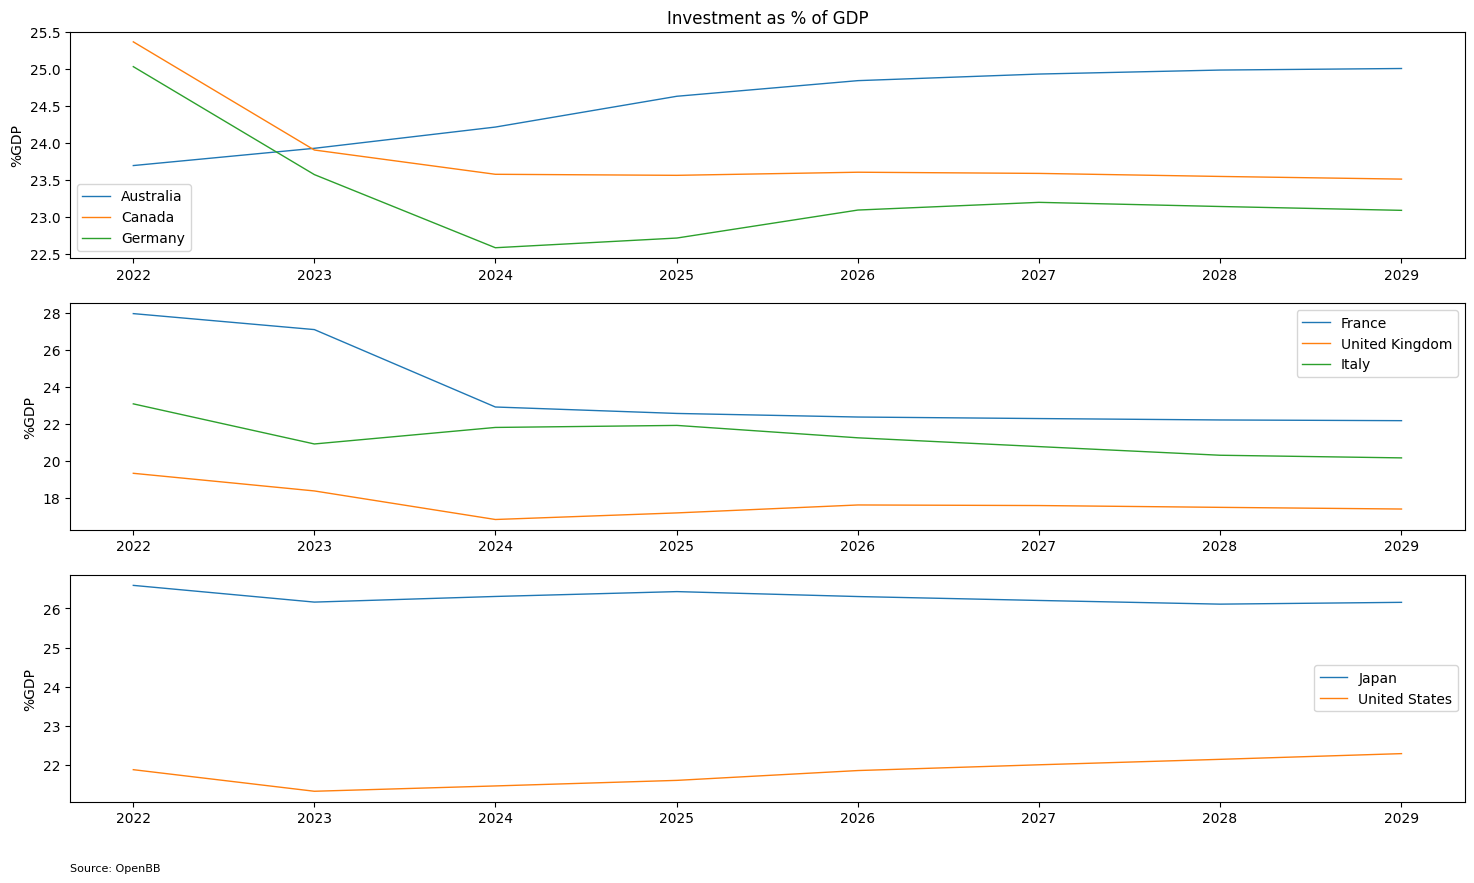

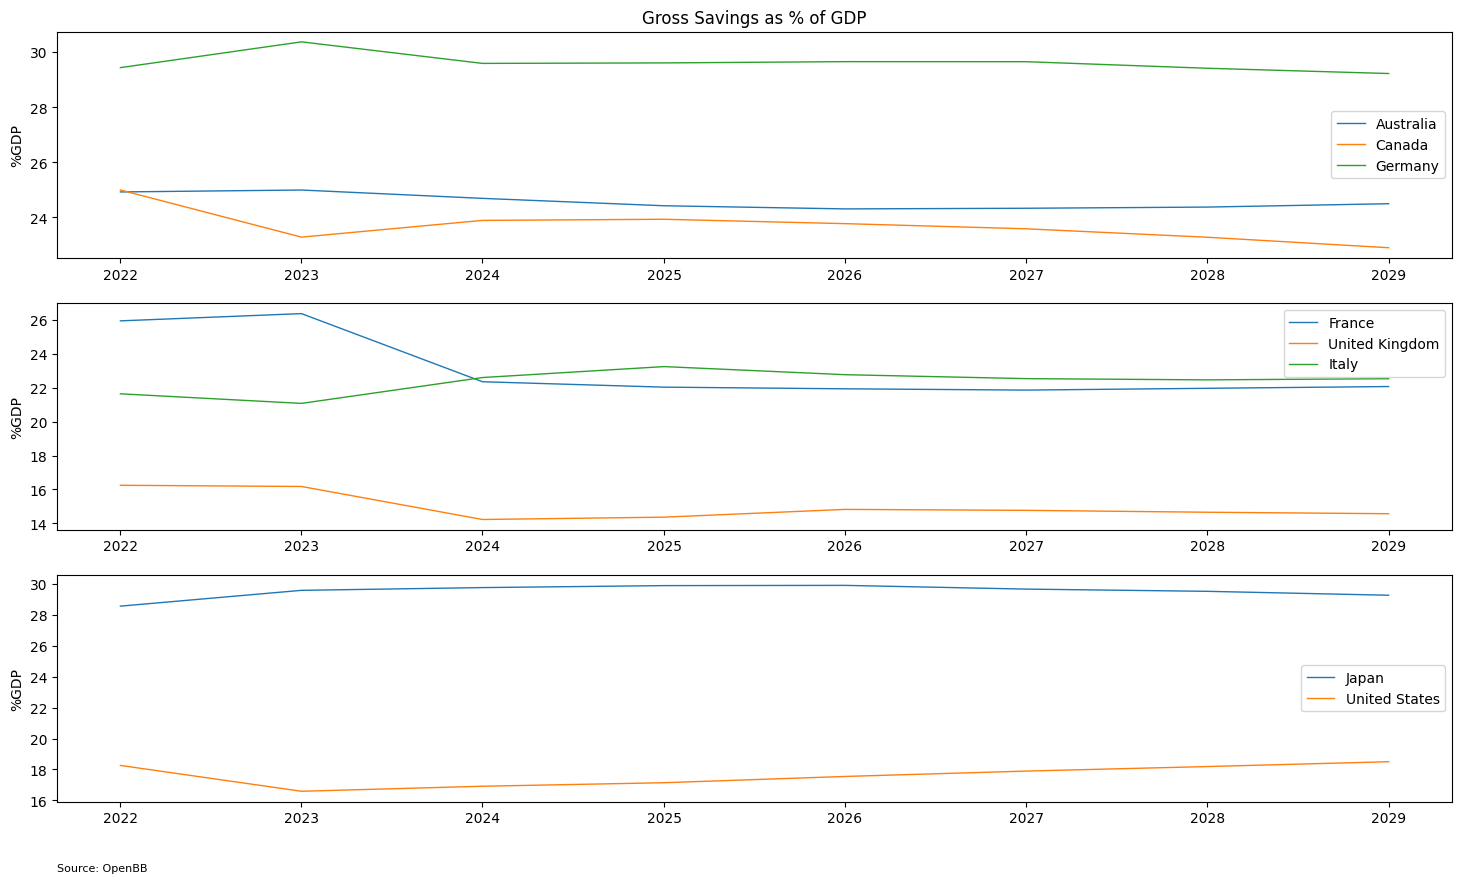

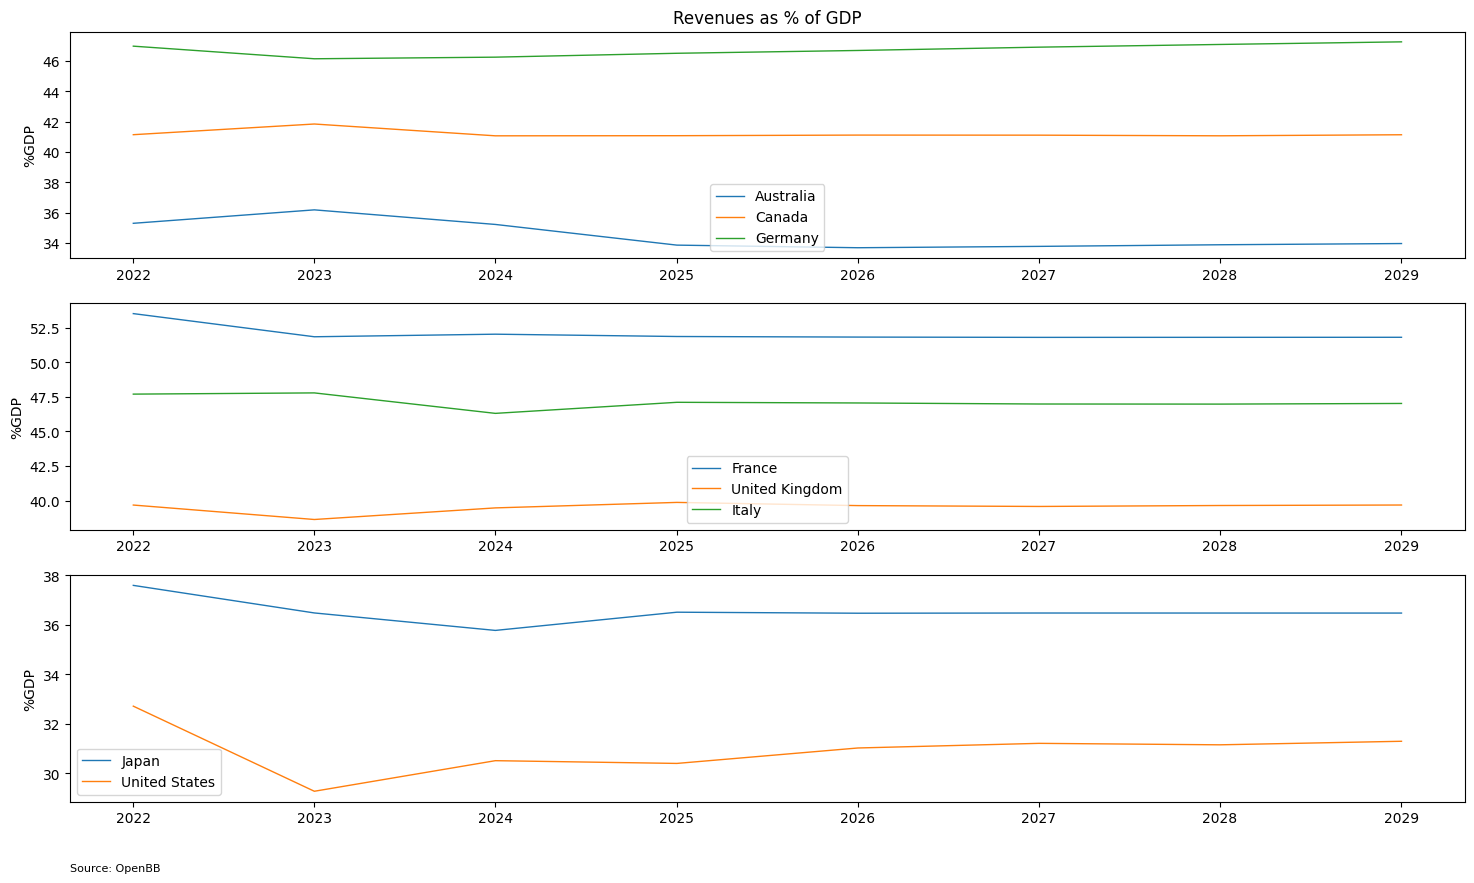

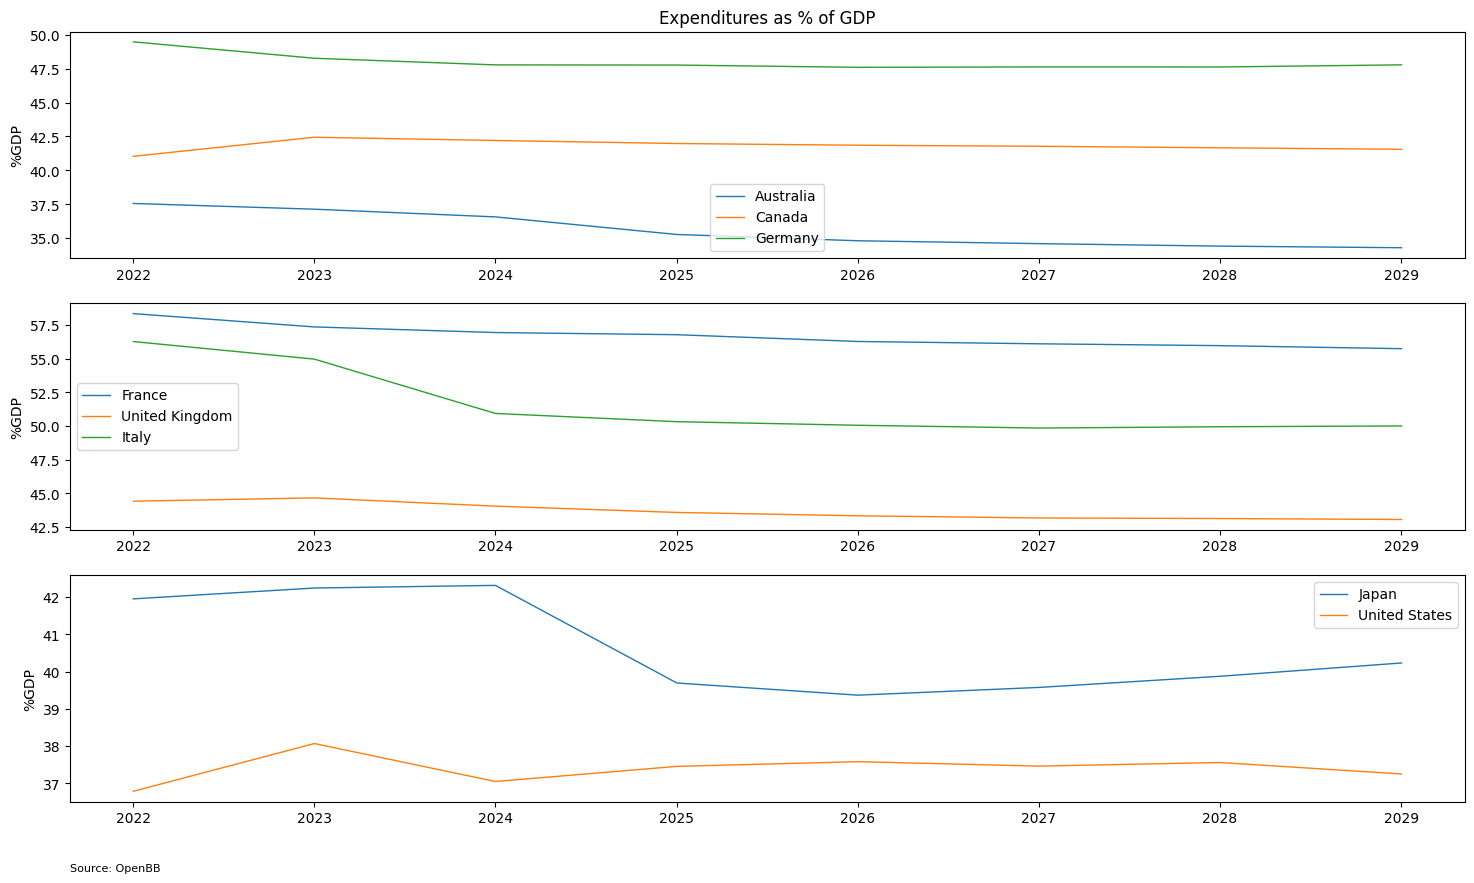

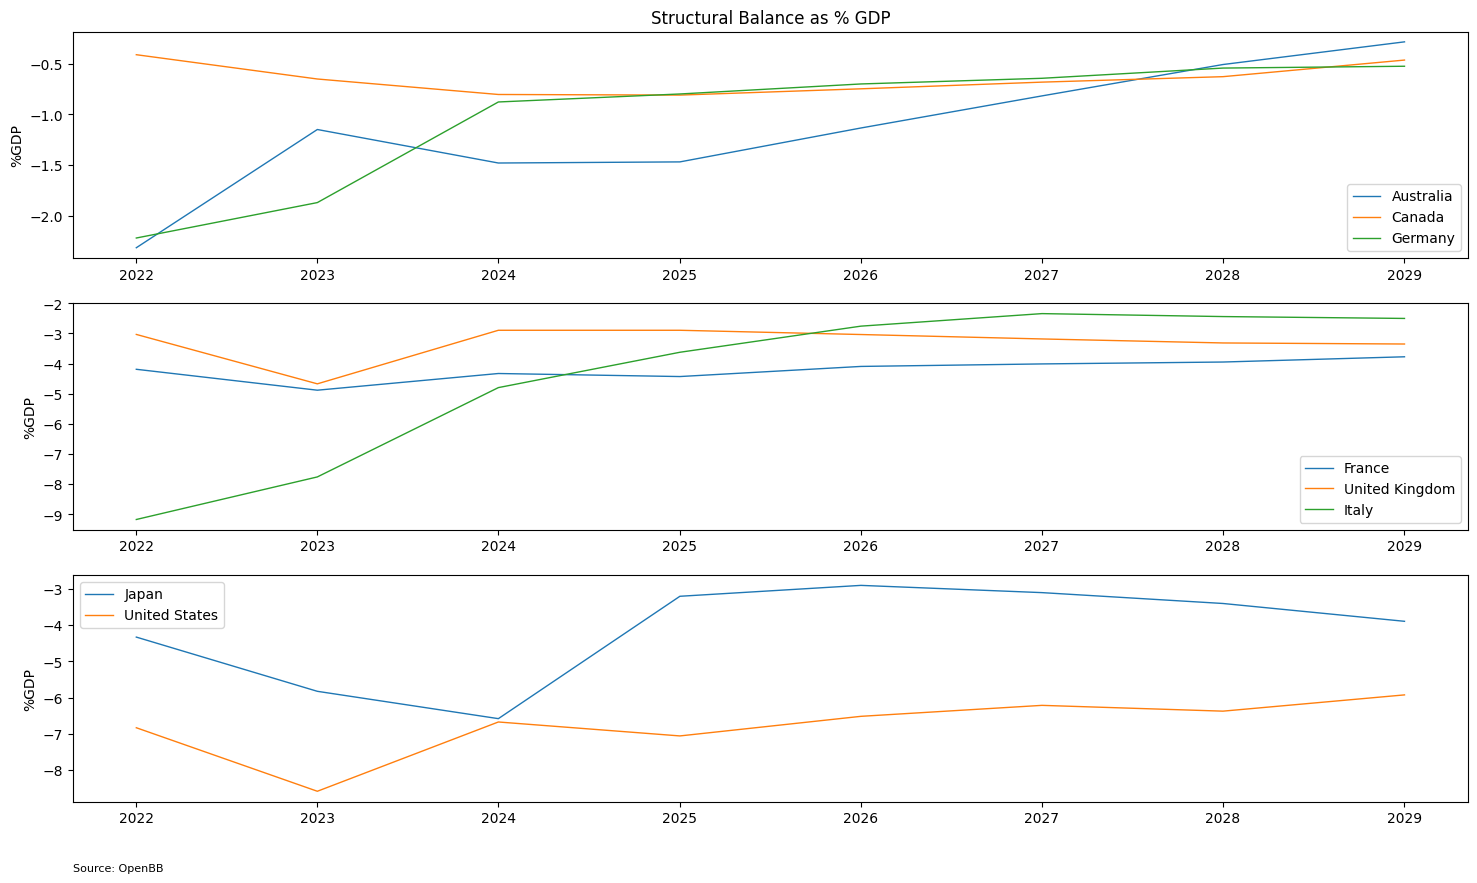

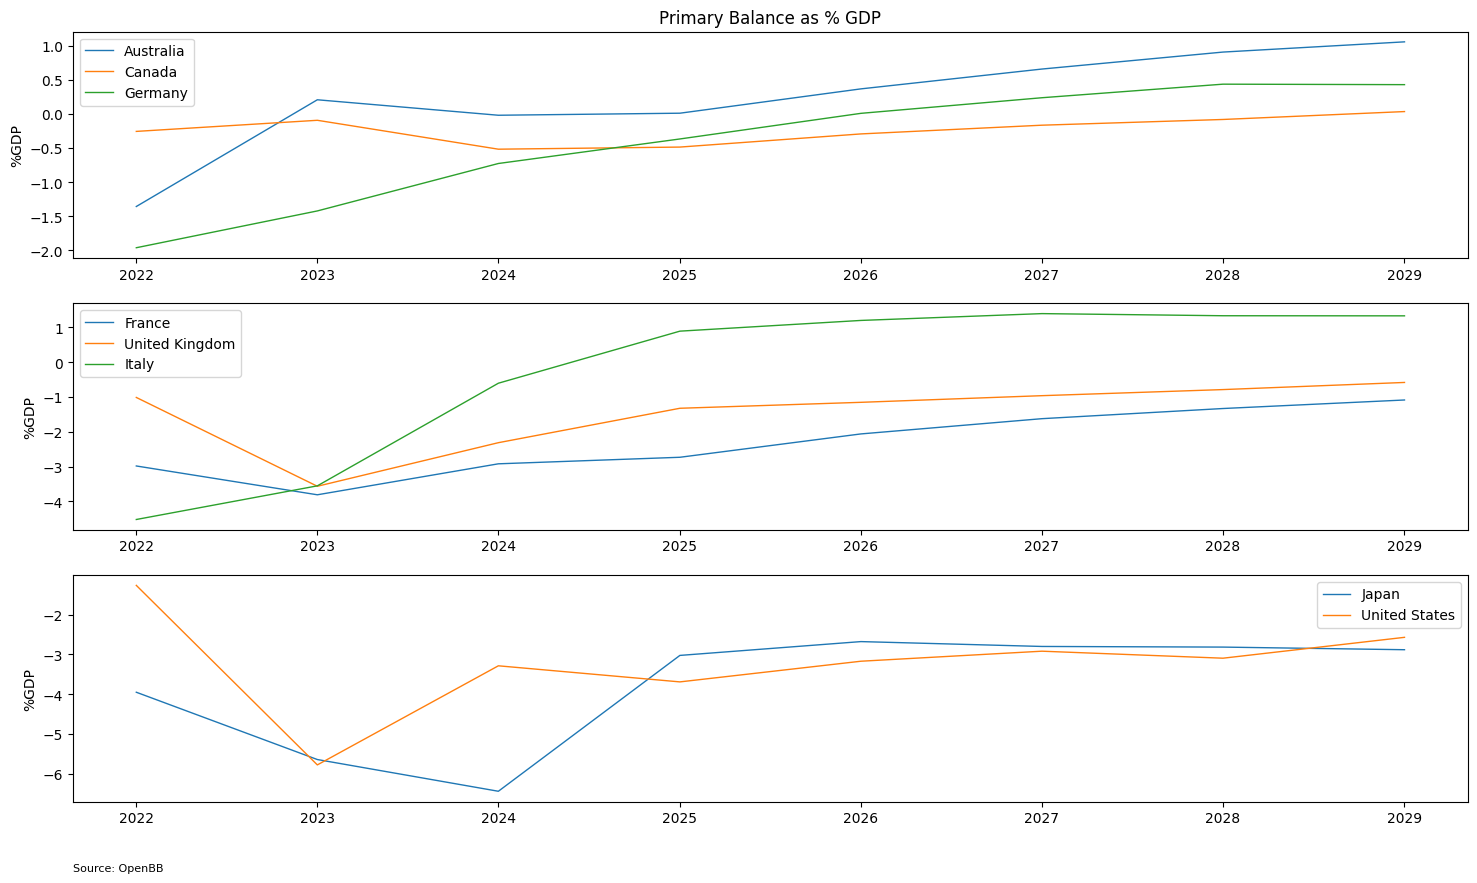

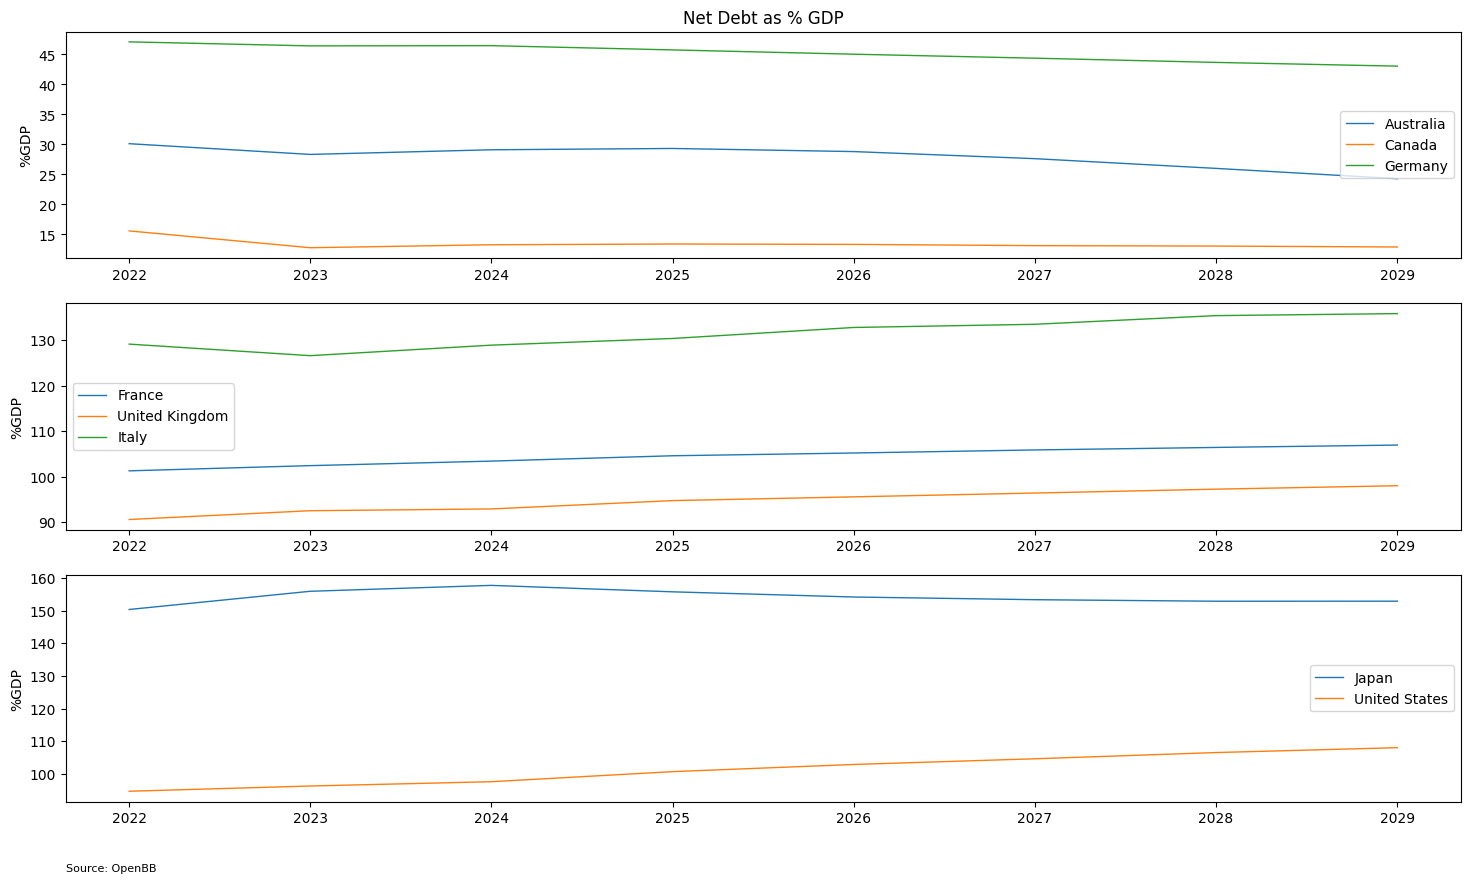

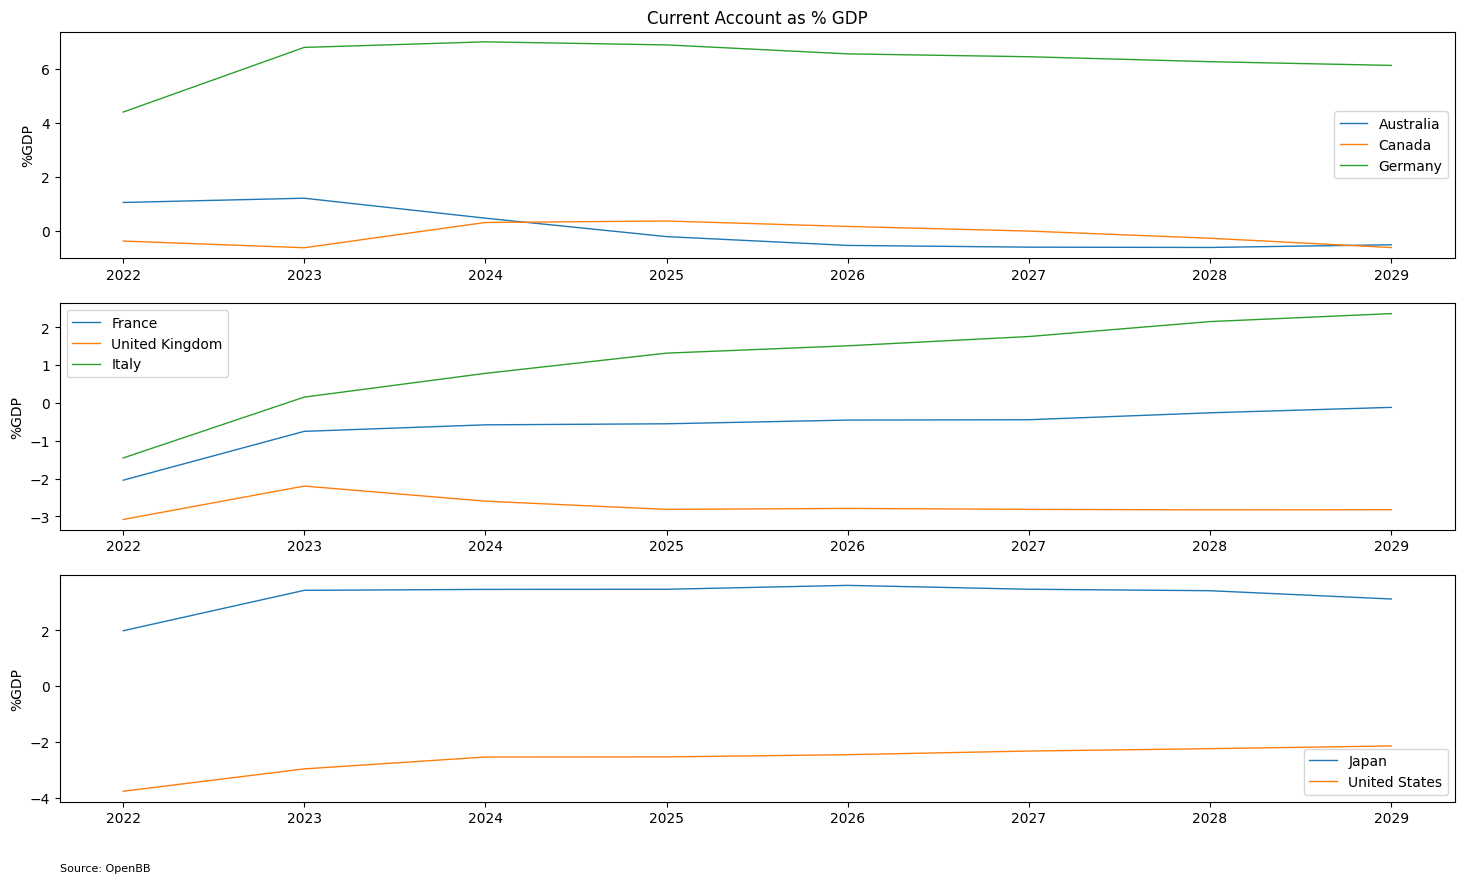

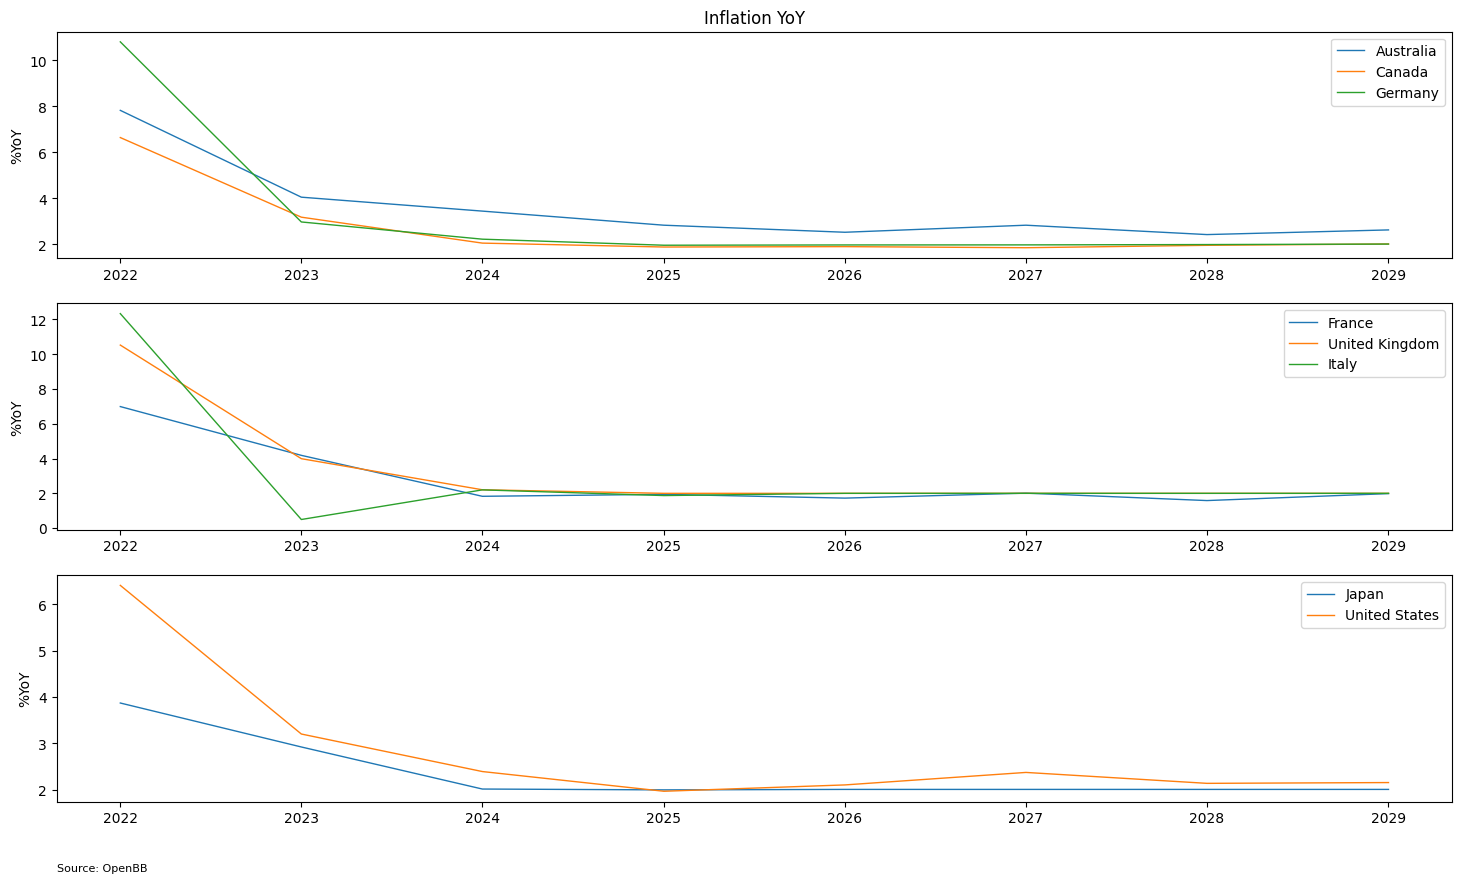

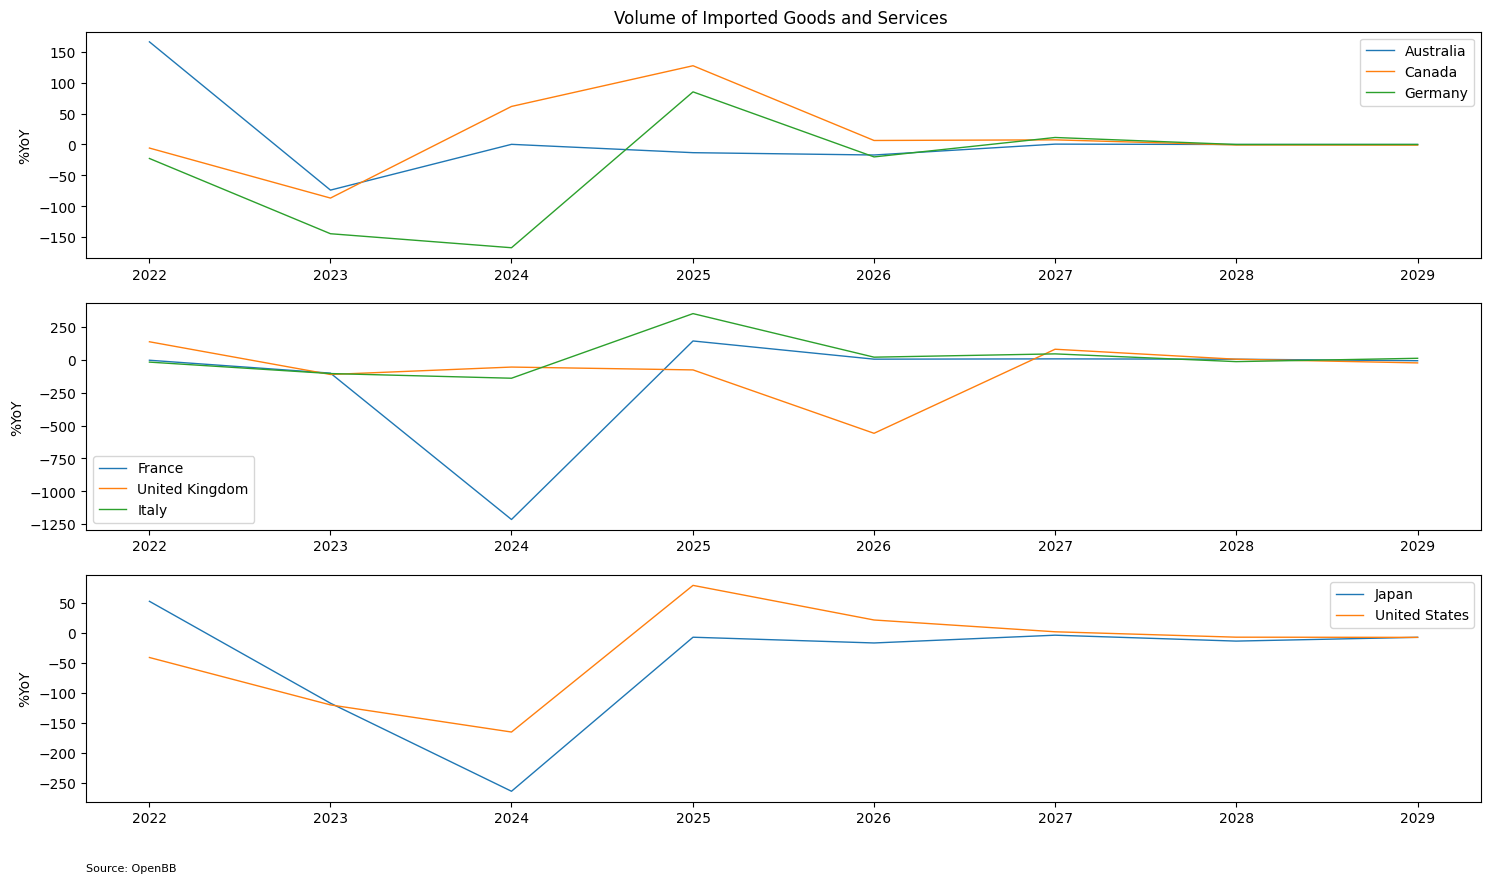

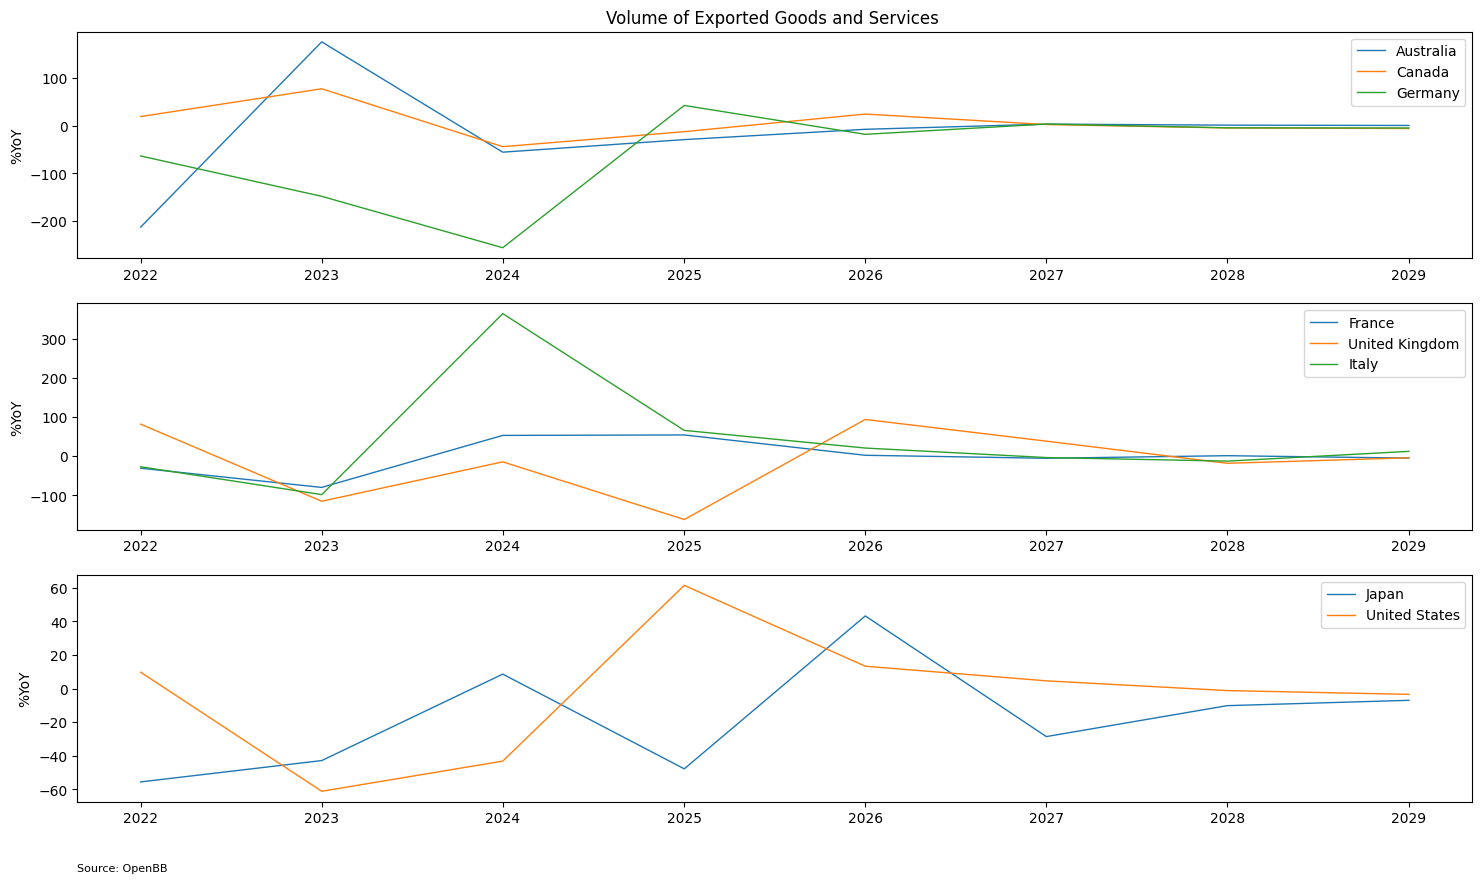

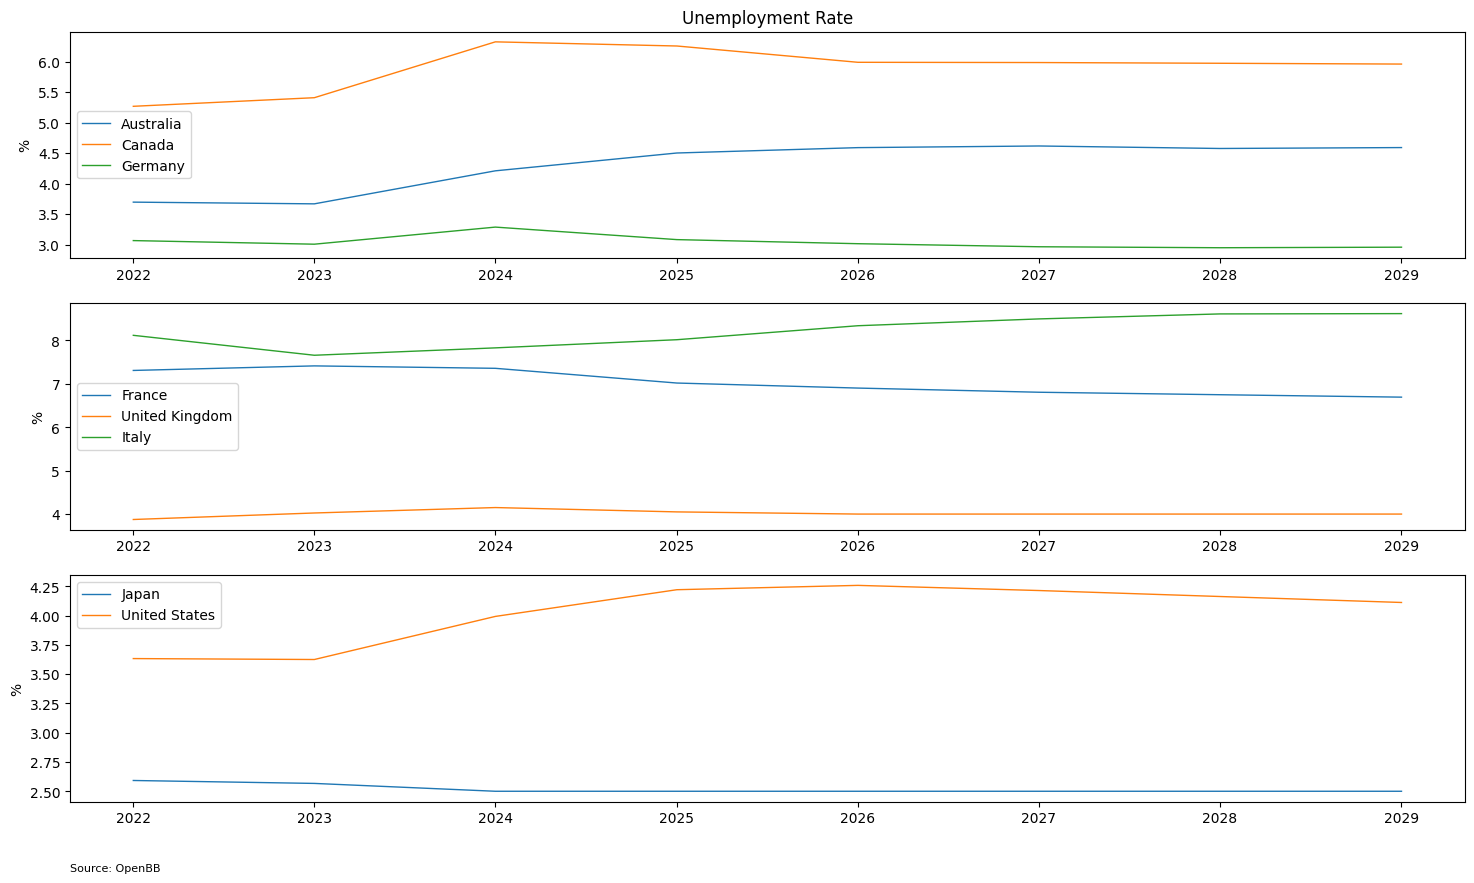

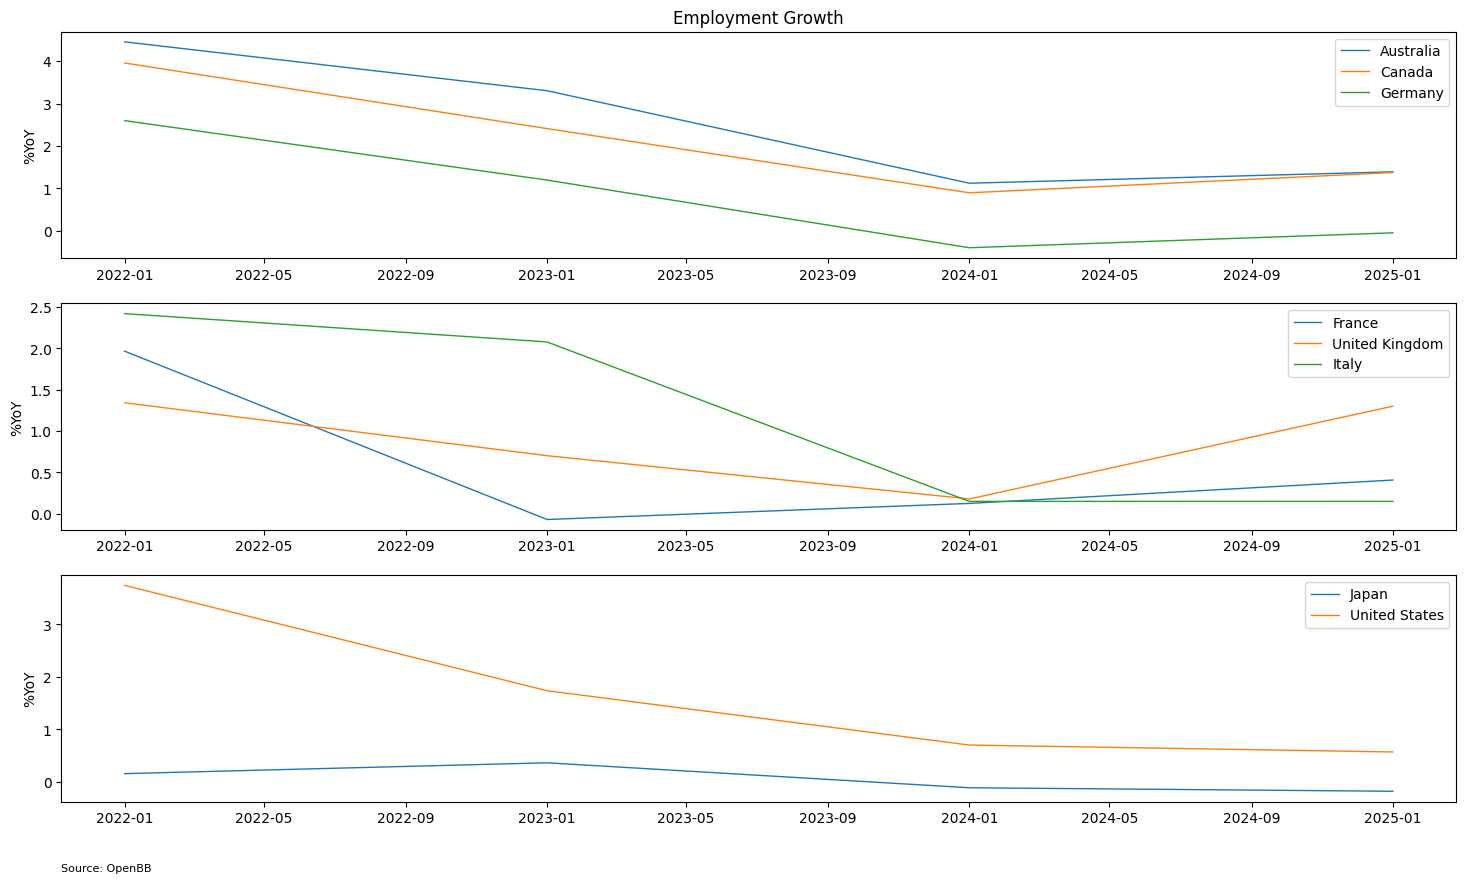

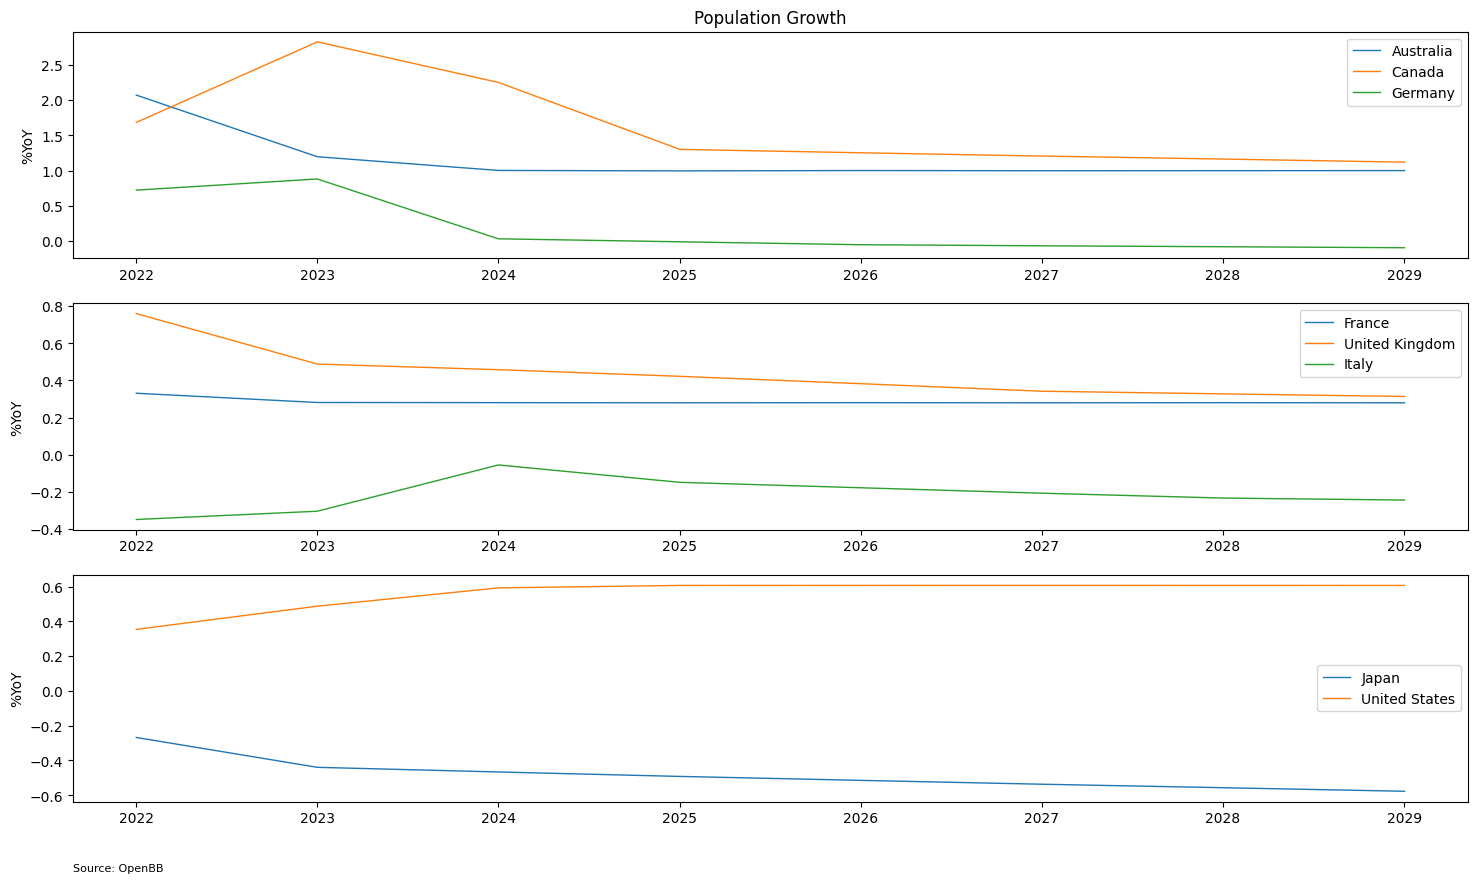

In [6]:
chart_start = "2022-01-01"
iterator = 0

for i in variables:
    

    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 1, 1]})
    fig.set_size_inches(18,10)

    y1 = imf[f'au_{i}'].loc[chart_start:]
    y2 = imf[f'ca_{i}'].loc[chart_start:]
    y3 = imf[f'de_{i}'].loc[chart_start:]
    y4 = imf[f'fr_{i}'].loc[chart_start:]
    y5 = imf[f'gb_{i}'].loc[chart_start:]
    y6 = imf[f'it_{i}'].loc[chart_start:]
    y7 = imf[f'jp_{i}'].loc[chart_start:]
    y8 = imf[f'us_{i}'].loc[chart_start:]

    ax0.set_title(Title[iterator])
    ax0.plot(y1, label="Australia",  linewidth=1)
    ax0.plot(y2, label="Canada",  linewidth=1)
    ax0.plot(y3, label="Germany",  linewidth=1)
    ax0.set_ylabel(ylabel=ylabels[iterator])
    ax0.legend()
    ax1.plot(y4, label="France",  linewidth=1)
    ax1.plot(y5, label="United Kingdom",  linewidth=1)
    ax1.plot(y6, label="Italy",  linewidth=1)
    ax1.set_ylabel(ylabel=ylabels[iterator])
    ax1.legend()
    ax2.plot(y7, label="Japan",  linewidth=1)
    ax2.plot(y8, label="United States",  linewidth=1)
    ax2.set_ylabel(ylabel=ylabels[iterator])
    ax2.legend()
    plt.annotate('Source: OpenBB', xy=(0, -50), xycoords='axes points', color='black', fontsize=8)
    plt.show()
    iterator = iterator + 1


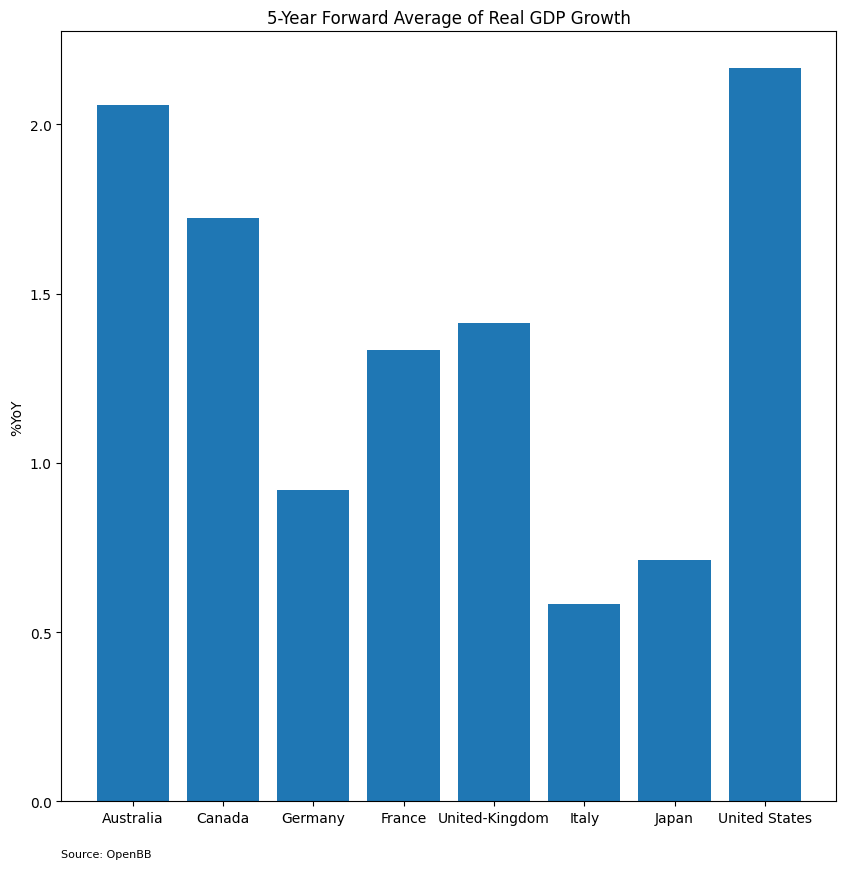

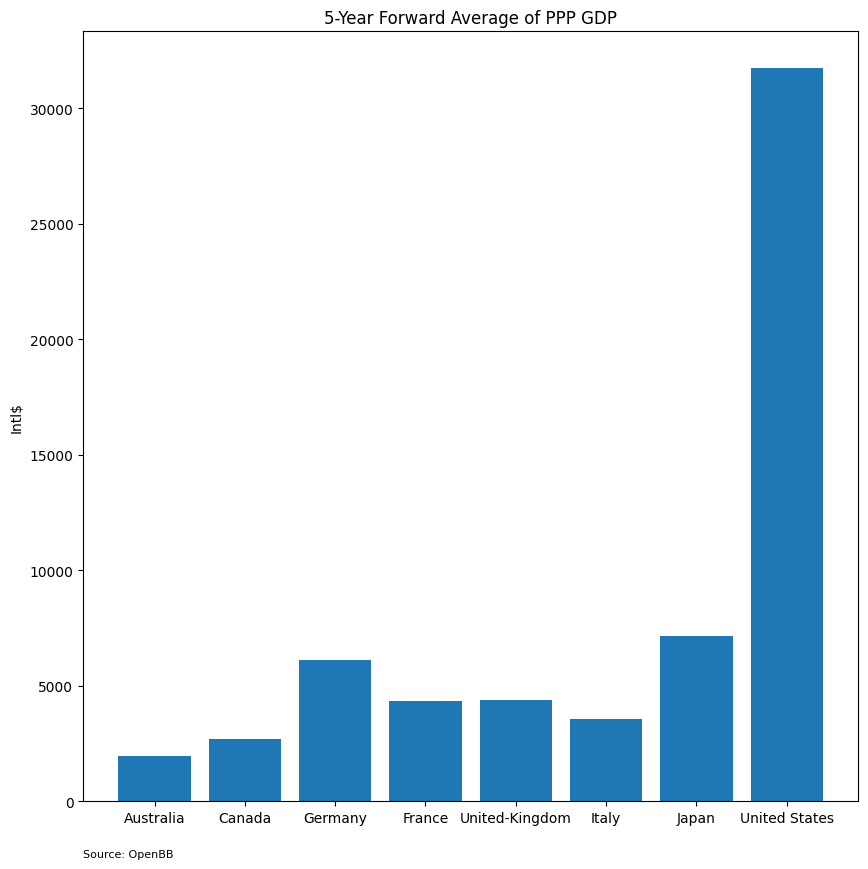

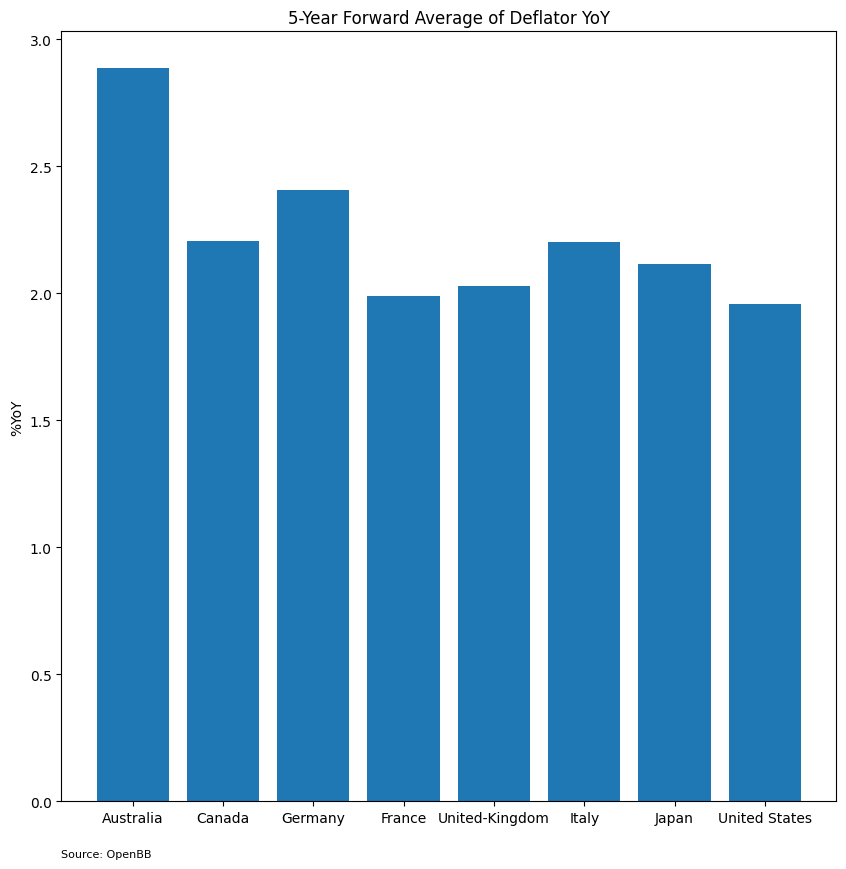

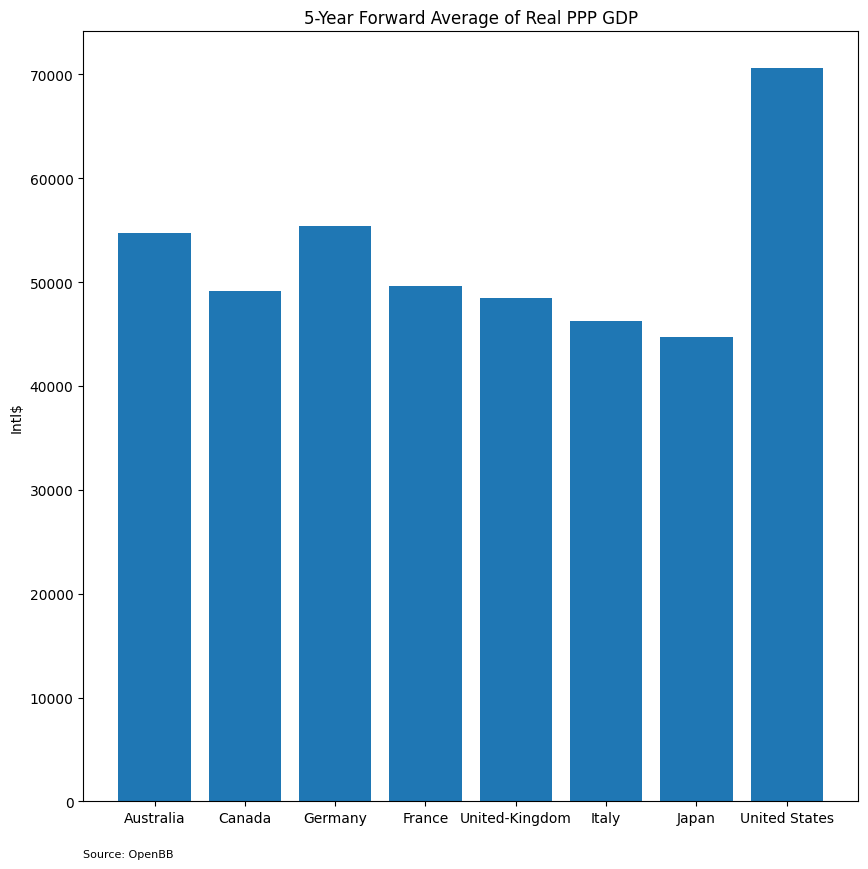

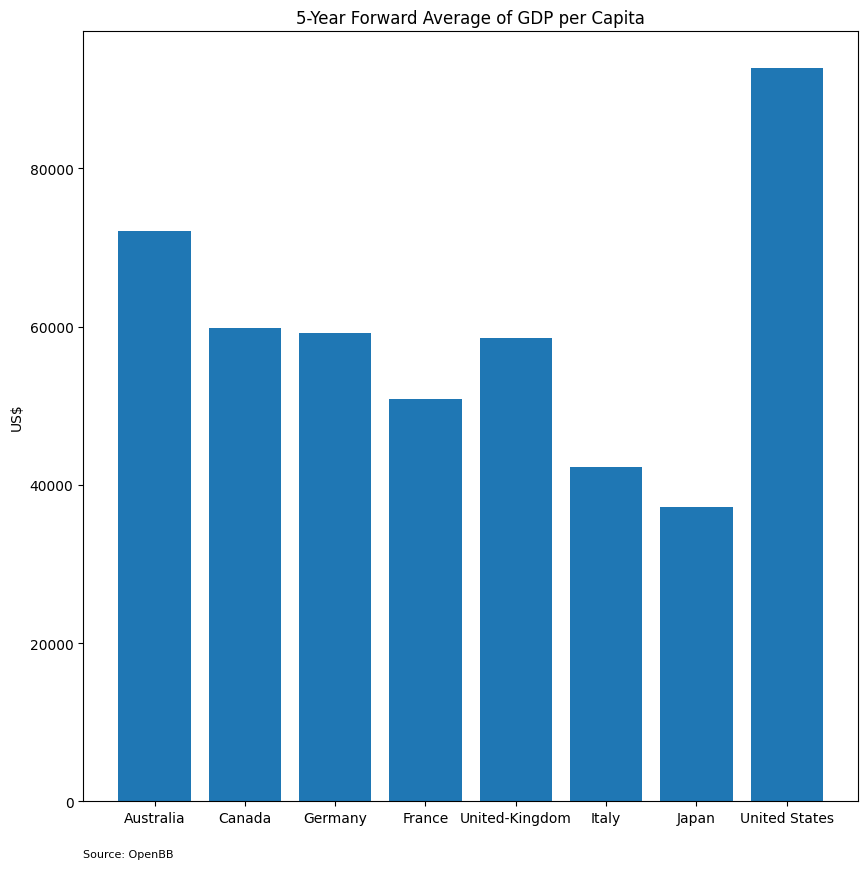

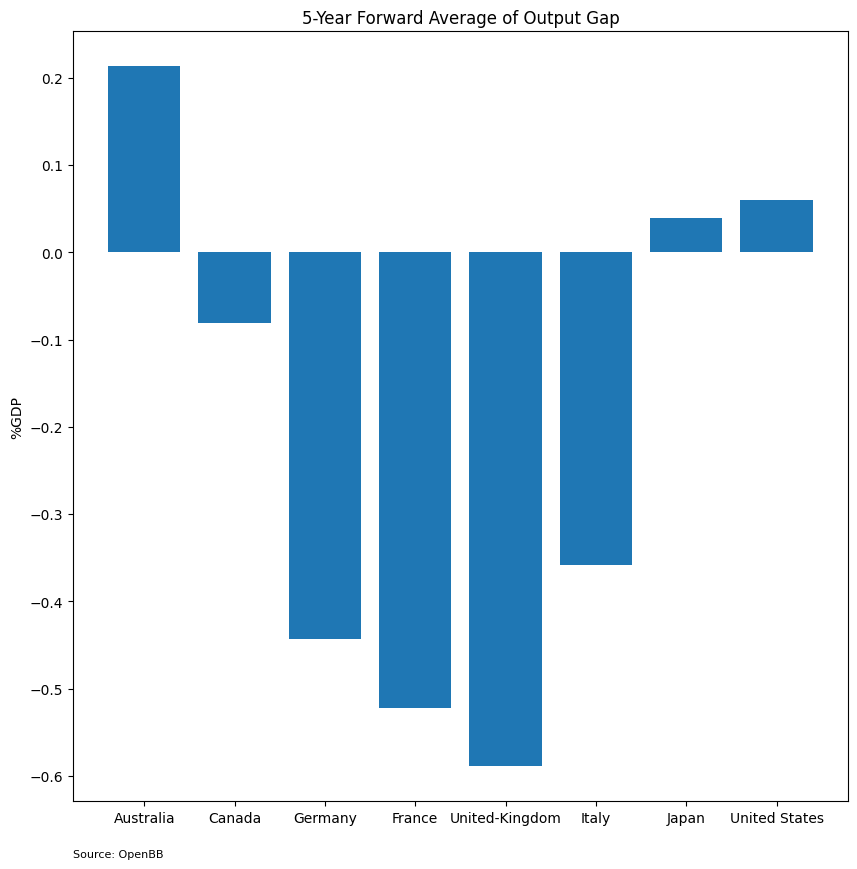

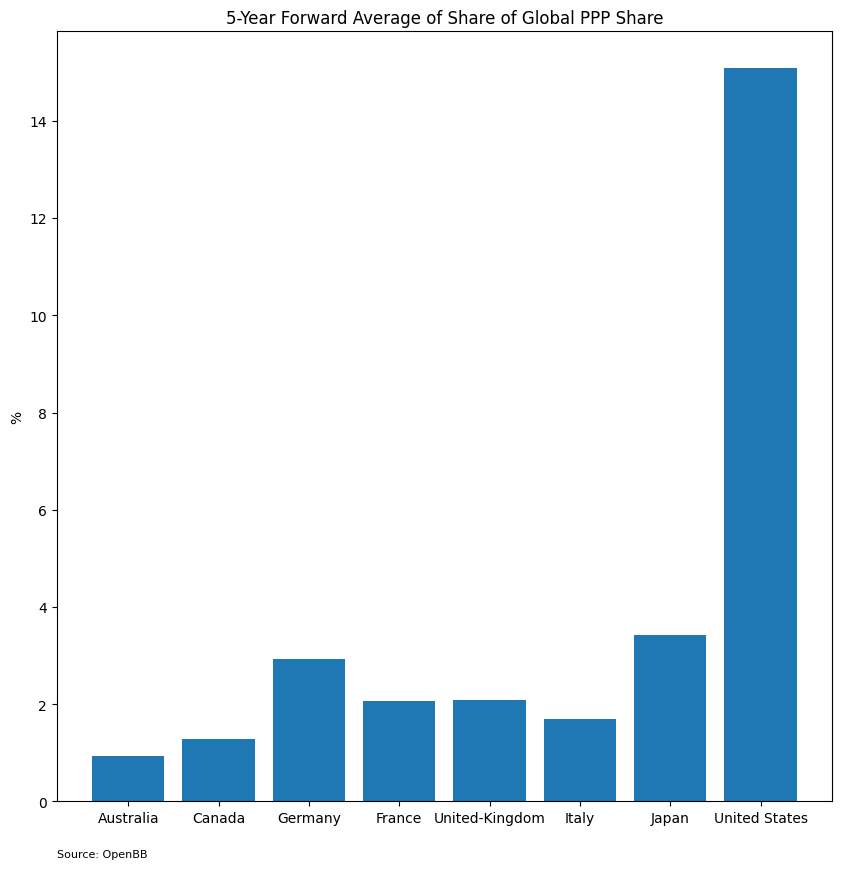

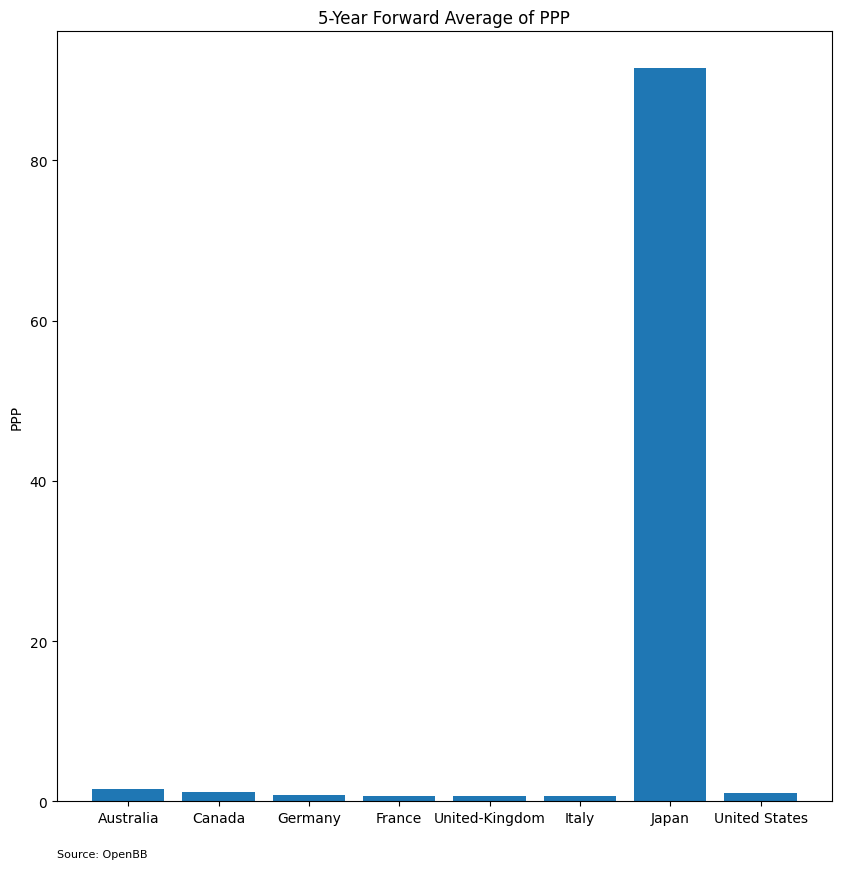

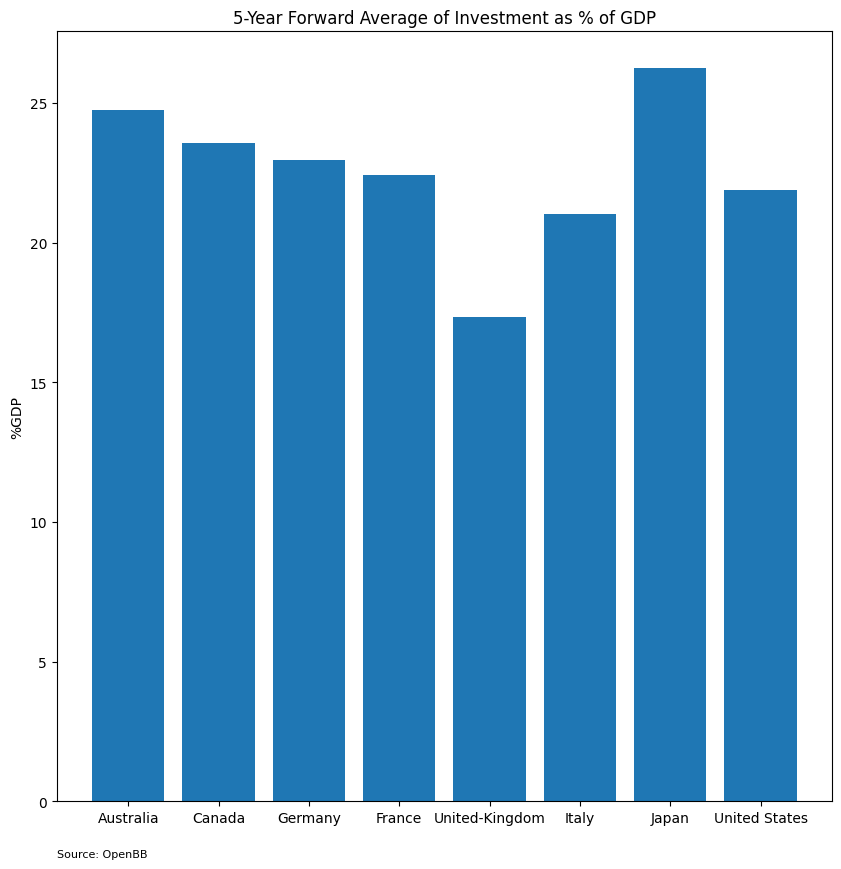

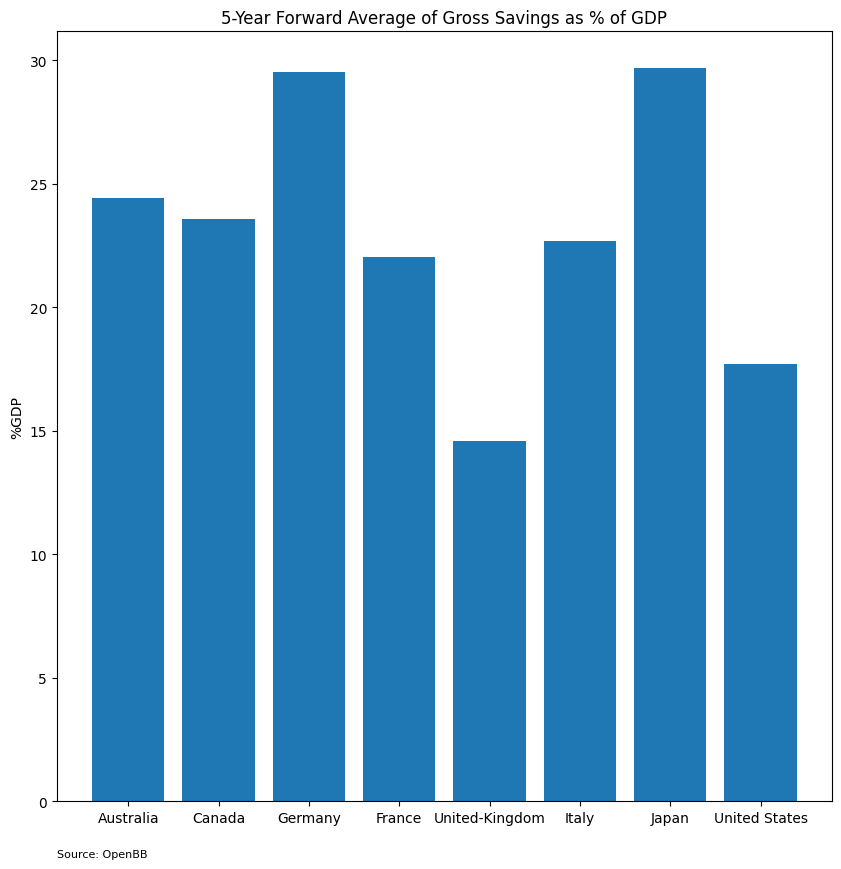

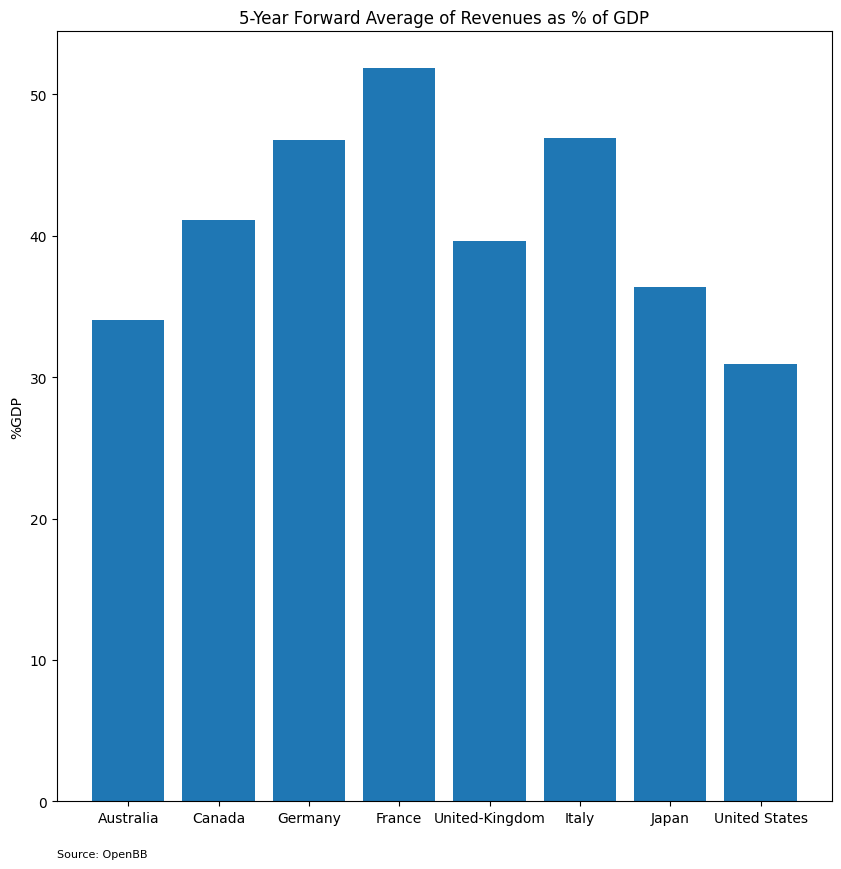

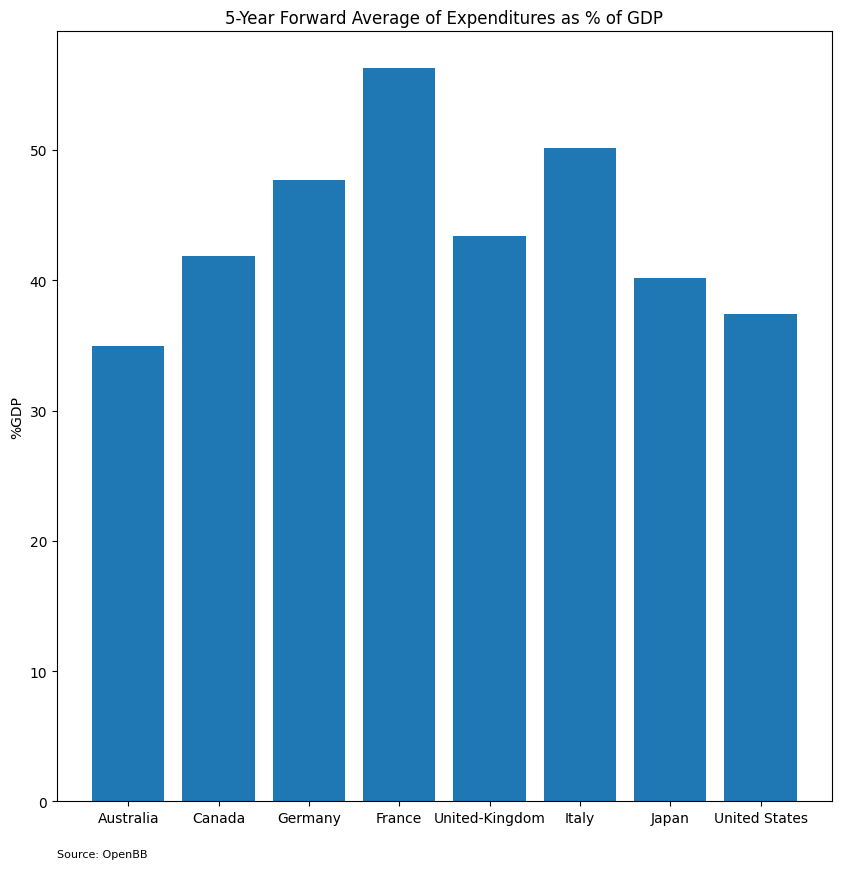

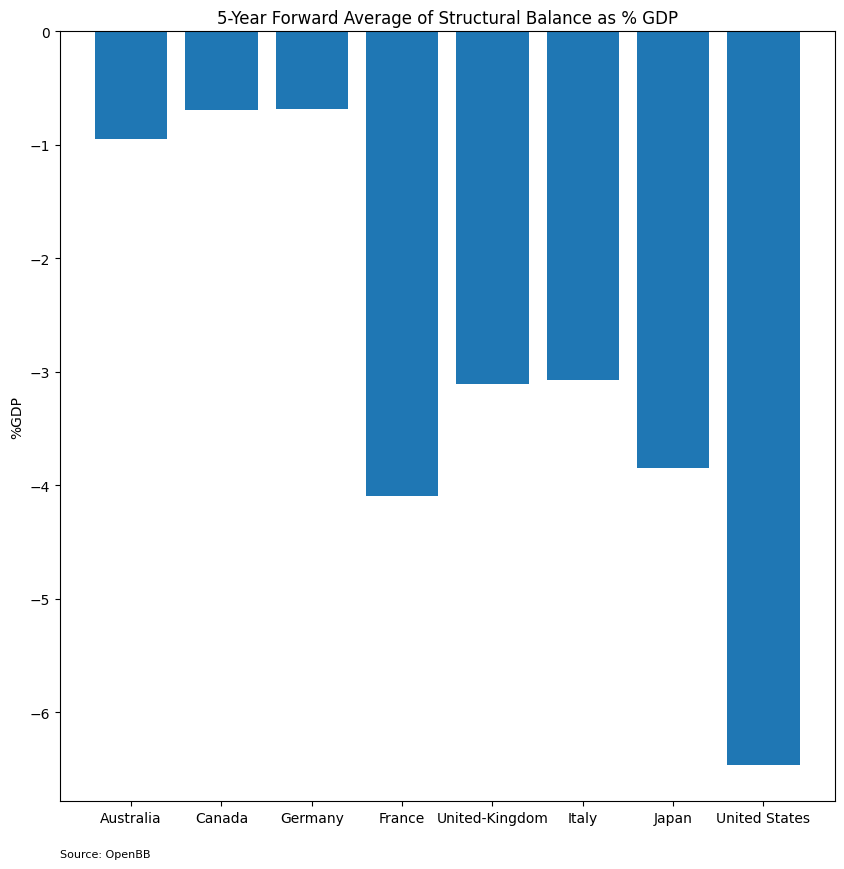

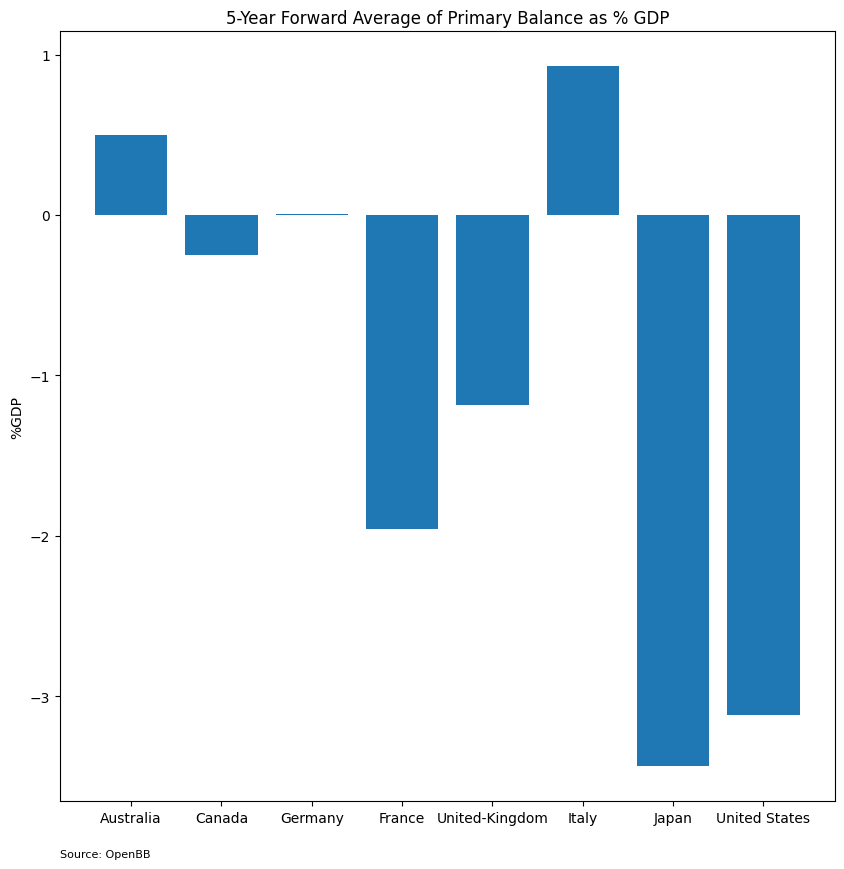

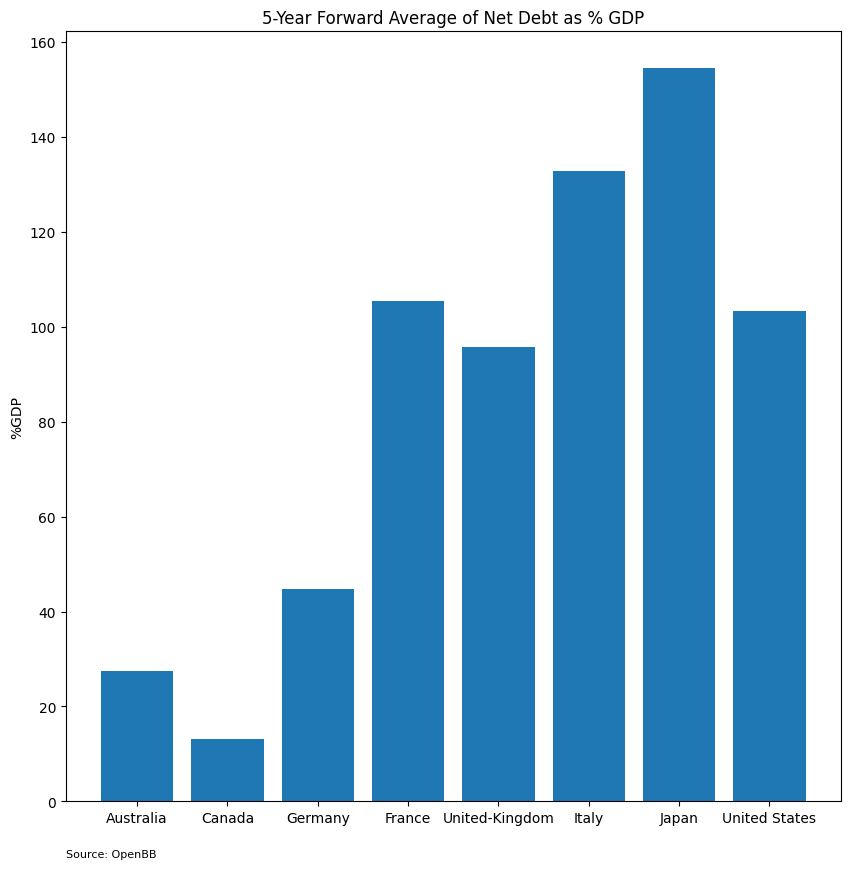

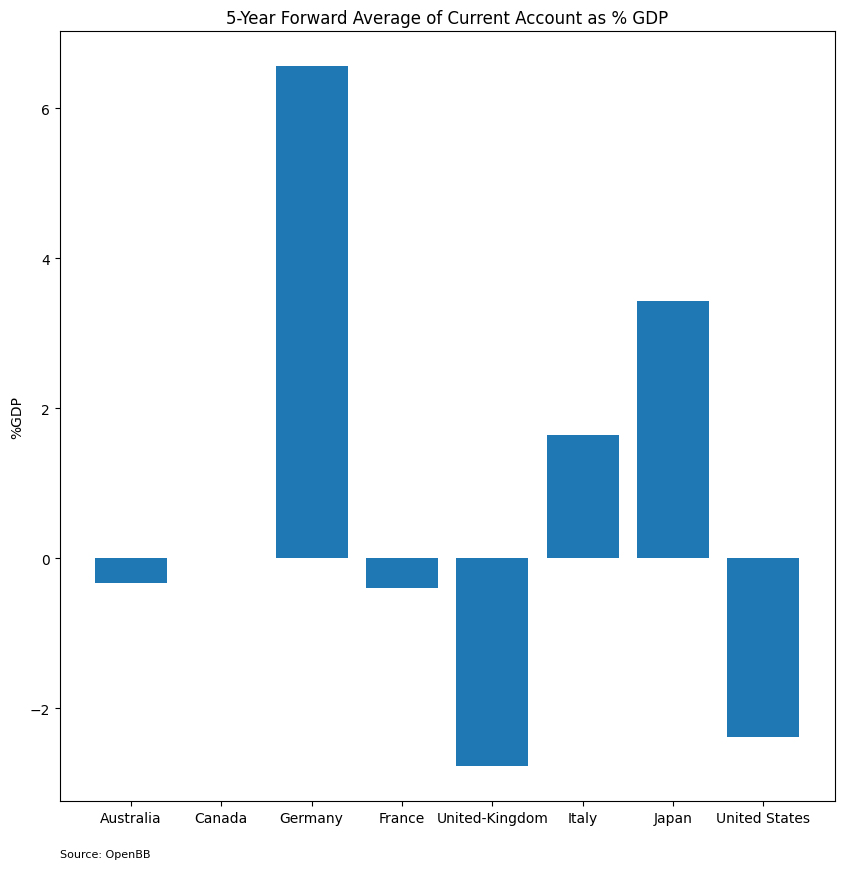

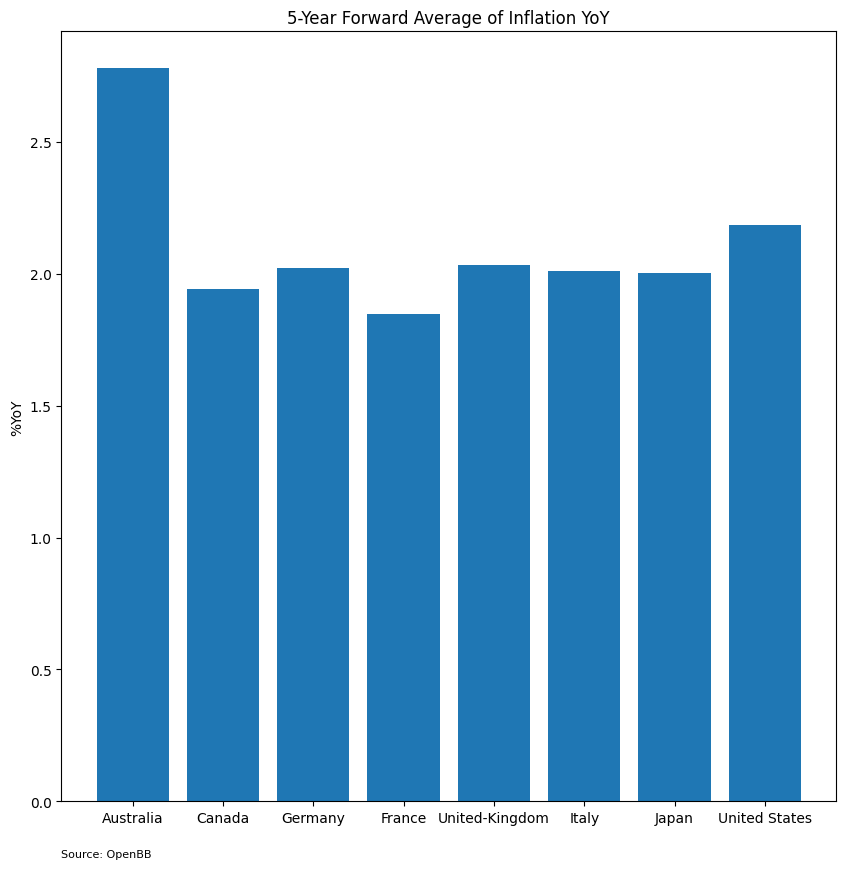

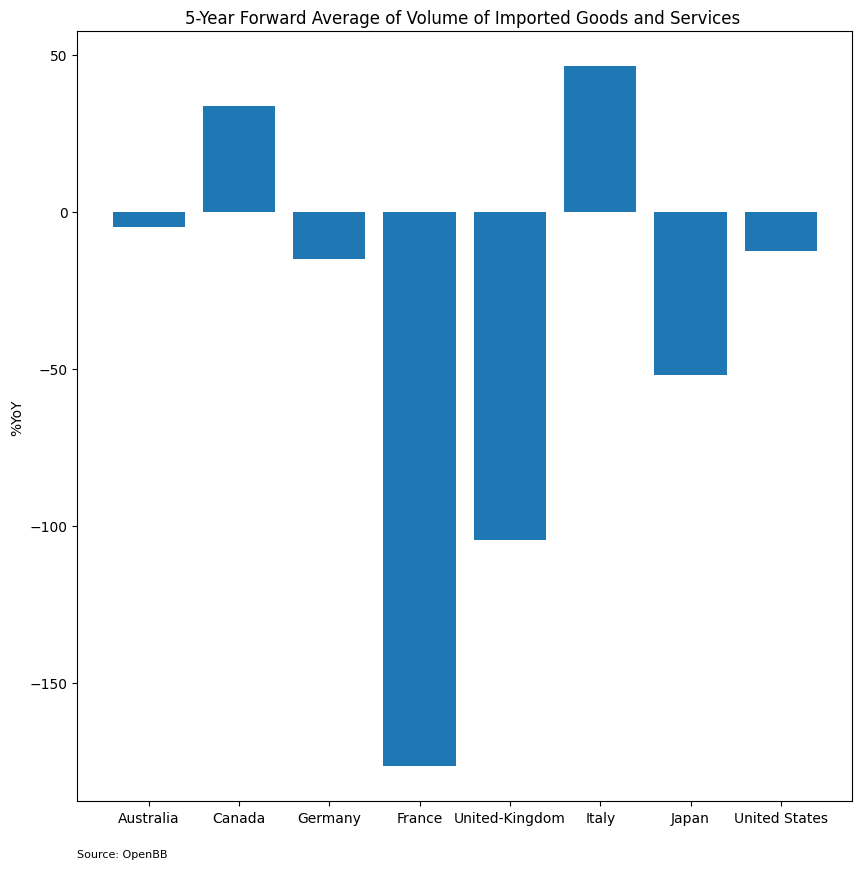

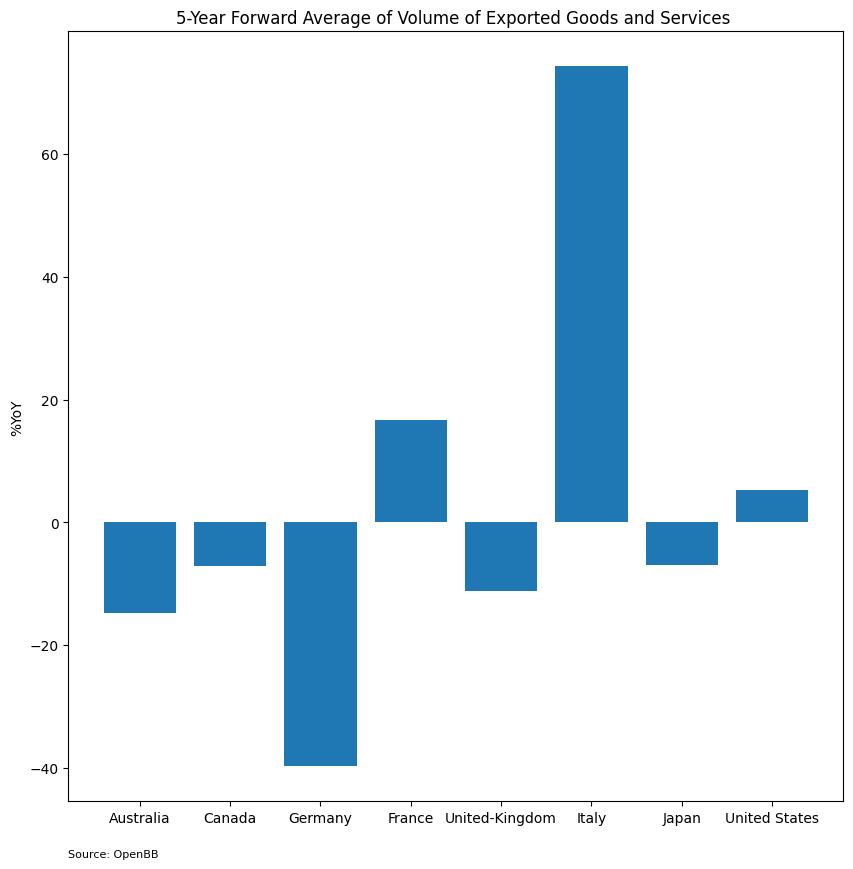

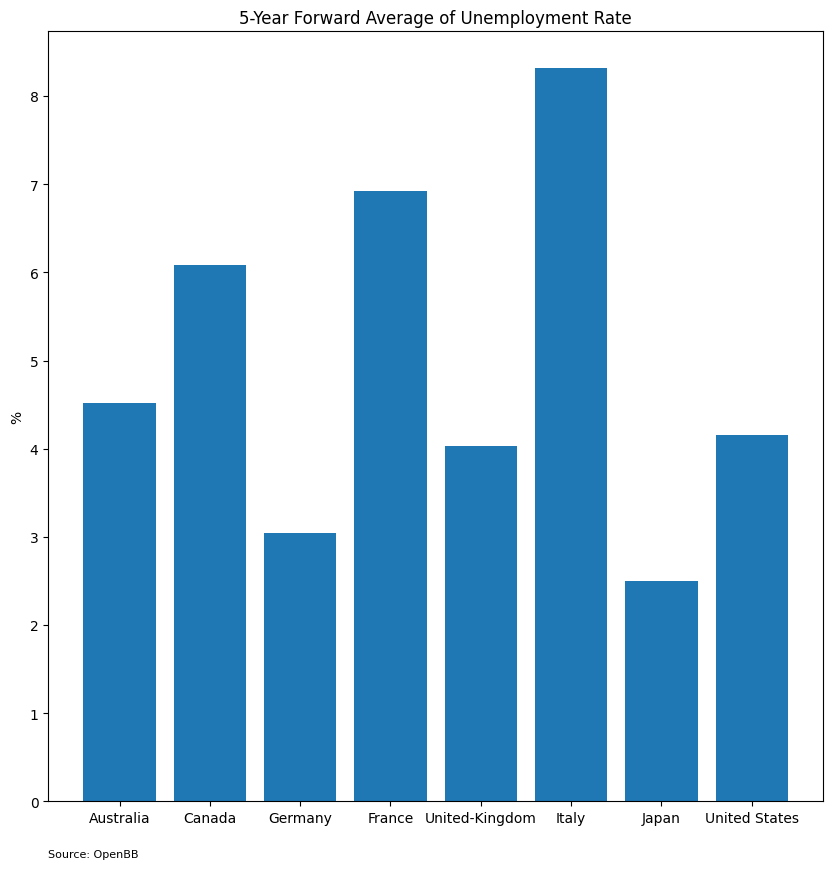

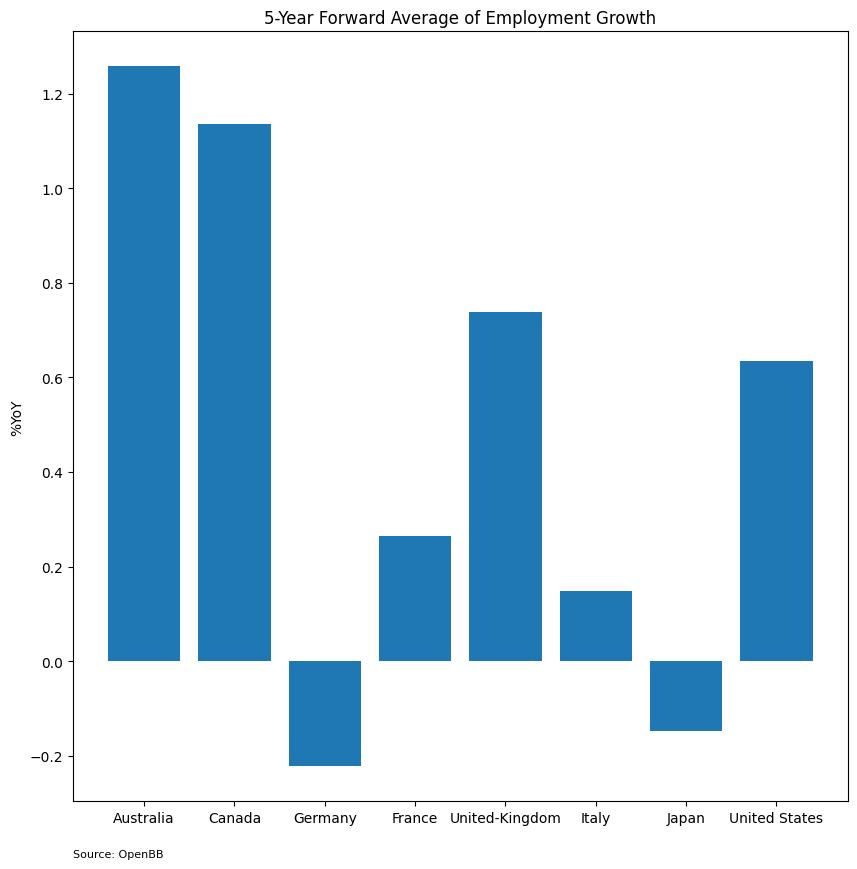

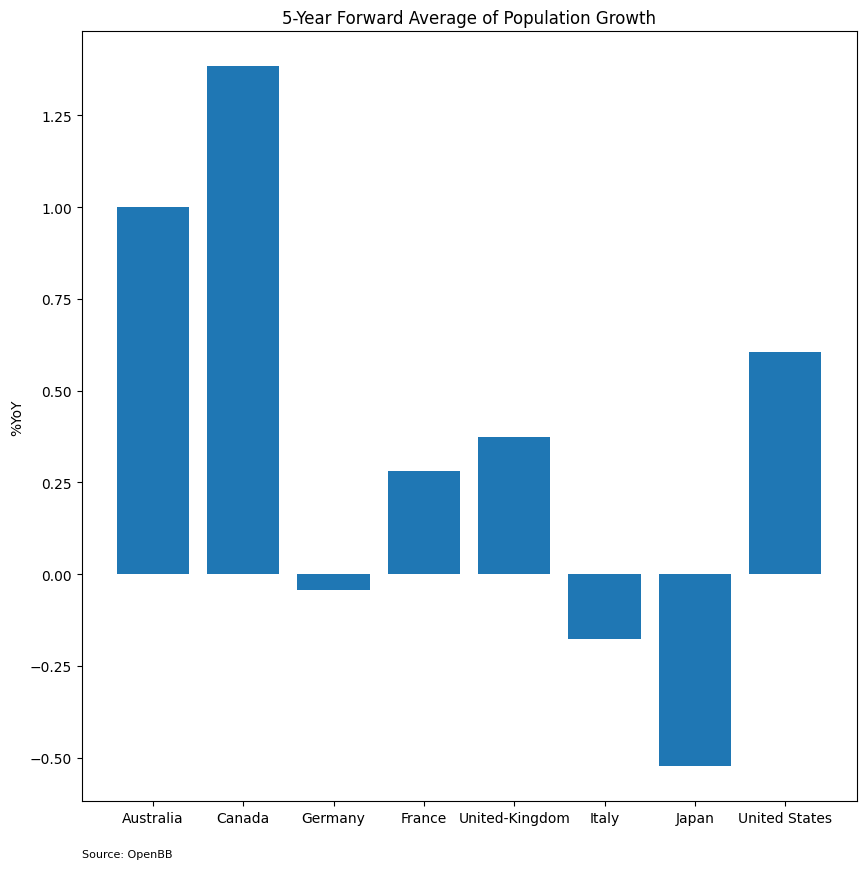

In [7]:
chart_start = "2022-01-01"

iterator = 0

for i in variables:
    y1 = imf[f'au_{i}'][-6:].mean()
    y2 = imf[f'ca_{i}'][-6:].mean()
    y3 = imf[f'de_{i}'][-6:].mean()
    y4 = imf[f'fr_{i}'][-6:].mean()
    y5 = imf[f'gb_{i}'][-6:].mean()
    y6 = imf[f'it_{i}'][-6:].mean()
    y7 = imf[f'jp_{i}'][-6:].mean()
    y8 = imf[f'us_{i}'][-6:].mean()
    ymean = [y1, y2, y3, y4, y5, y6, y7, y8]
    
    fig, ax = plt.subplots(figsize = (10,10))

    x = ['Australia', 'Canada', 'Germany', 'France', 'United-Kingdom', 'Italy', 'Japan', 'United States']
    height = imf[f'us_{i}']


    ax.bar(x, ymean)
    ax.set_ylabel(ylabels[iterator])
    ax.set_title(f'5-Year Forward Average of {Title[iterator]}')
    plt.annotate('Source: OpenBB', xy=(0, -40), xycoords='axes points', color='black', fontsize=8)
    plt.show()
    iterator = iterator + 1

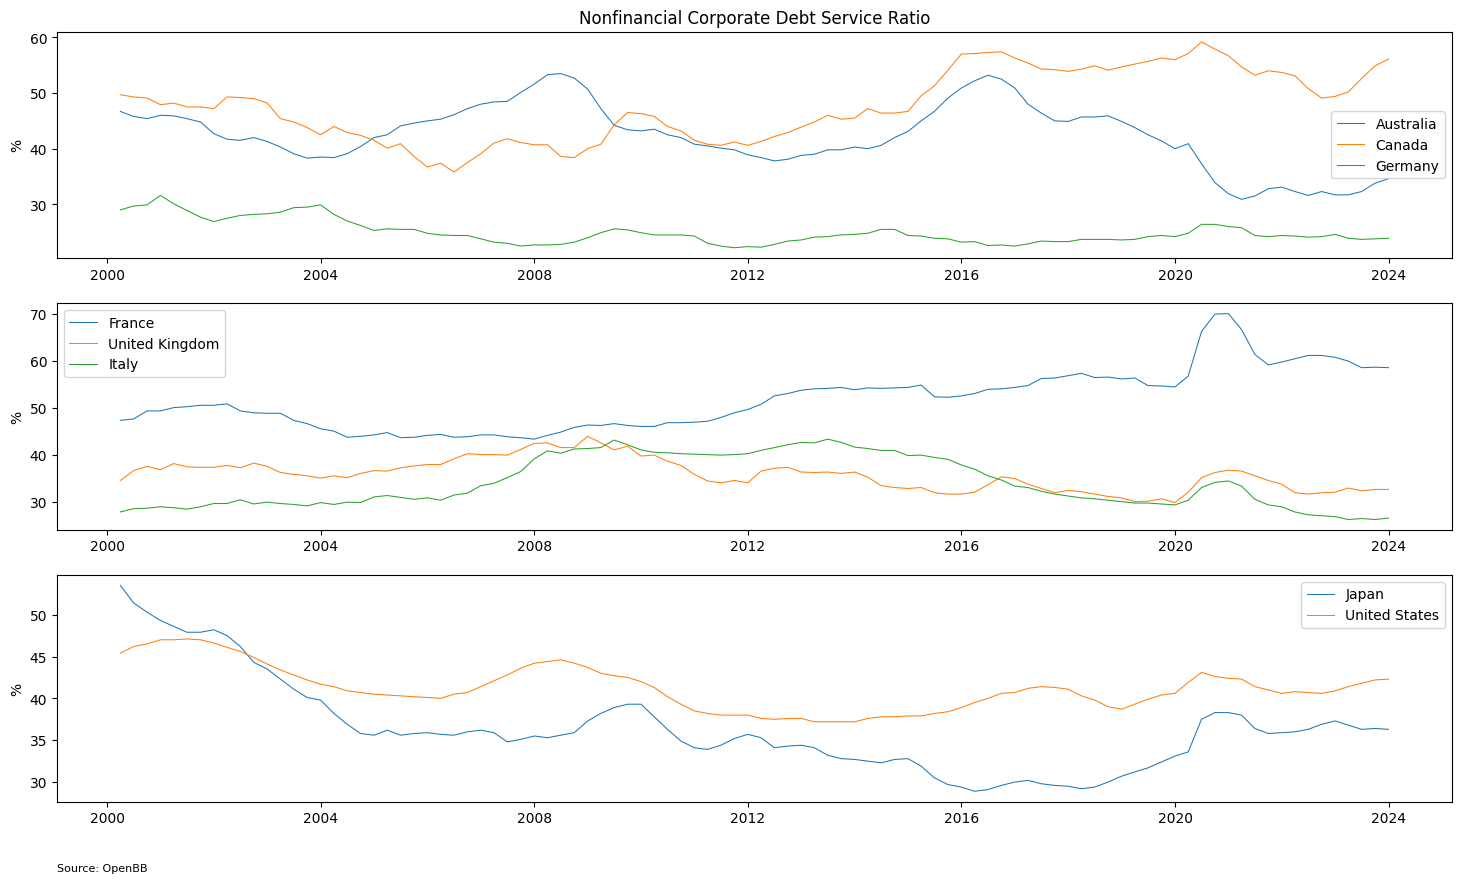

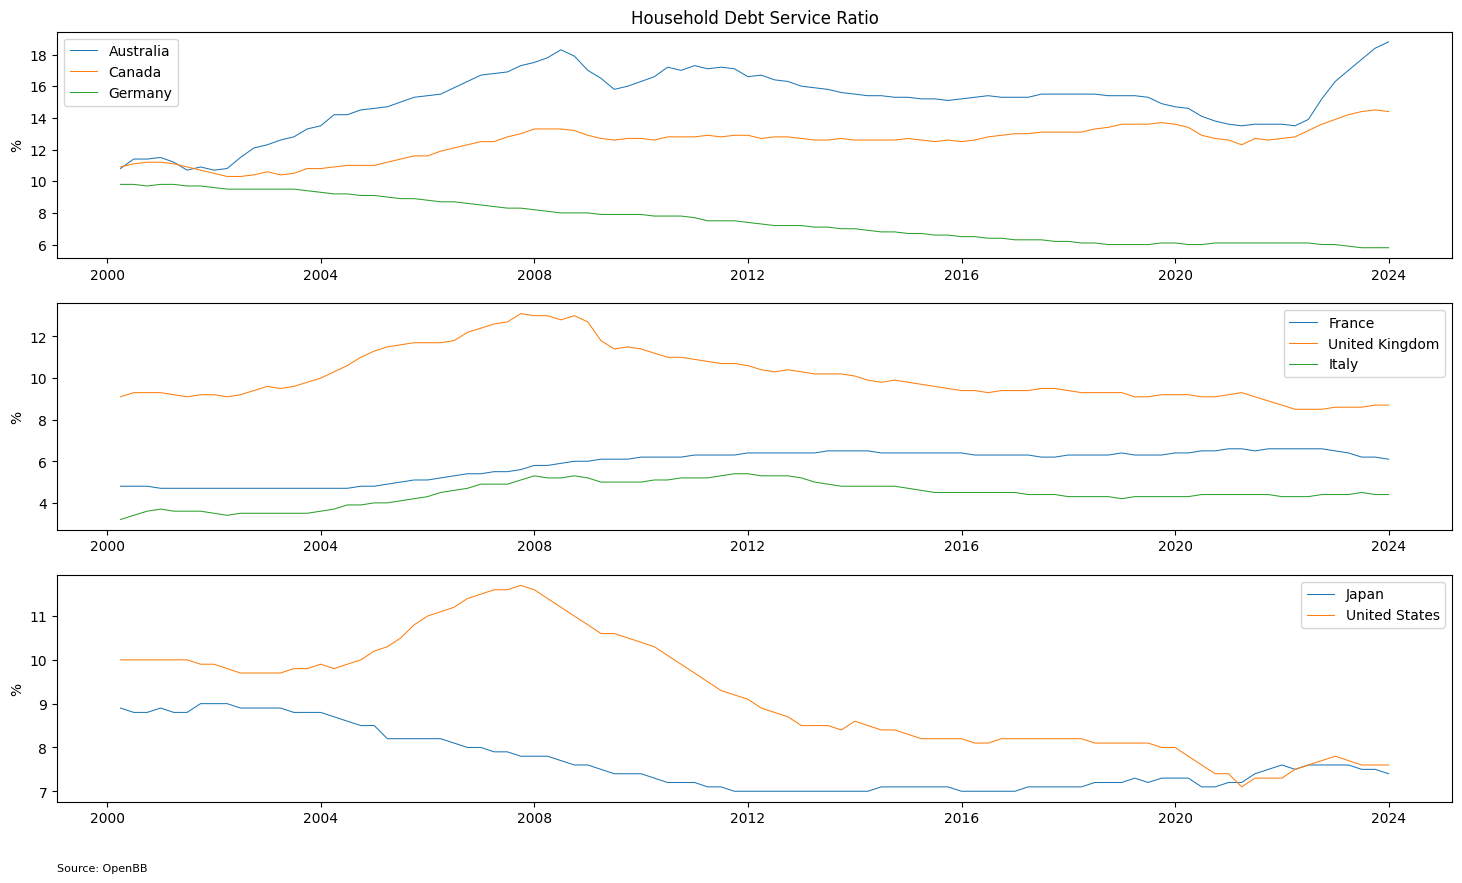

In [8]:
Title_dsr = ['Nonfinancial Corporate Debt Service Ratio', 'Household Debt Service Ratio']
chart_start = "2000-01-01"



iterator = 0
for i in ['DSRCorp','DSRHH']:
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 1, 1]})
    fig.set_size_inches(18,10)

    y1 = bis[f'au_{i}'].loc[chart_start:]
    y2 = bis[f'ca_{i}'].loc[chart_start:]
    y3 = bis[f'de_{i}'].loc[chart_start:]
    y4 = bis[f'fr_{i}'].loc[chart_start:]
    y5 = bis[f'gb_{i}'].loc[chart_start:]
    y6 = bis[f'it_{i}'].loc[chart_start:]
    y7 = bis[f'jp_{i}'].loc[chart_start:]
    y8 = bis[f'us_{i}'].loc[chart_start:]

    ax0.set_title(Title_dsr[iterator])
    ax0.plot(y1, label="Australia",  linewidth=0.75)
    ax0.plot(y2, label="Canada",  linewidth=0.75)
    ax0.plot(y3, label="Germany",  linewidth=0.75)
    ax0.set_ylabel(ylabel='%')
    ax0.legend()
    ax1.plot(y4, label="France",  linewidth=0.75)
    ax1.plot(y5, label="United Kingdom",  linewidth=0.75)
    ax1.plot(y6, label="Italy",  linewidth=0.75)
    ax1.set_ylabel(ylabel='%')
    ax1.legend()
    ax2.plot(y7, label="Japan",  linewidth=0.75)
    ax2.plot(y8, label="United States",  linewidth=0.75)
    ax2.set_ylabel(ylabel='%')
    ax2.legend()
    plt.annotate('Source: OpenBB', xy=(0, -50), xycoords='axes points', color='black', fontsize=8)
    plt.show()
    iterator = iterator + 1

